### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import sklearn


In [2]:
# Load the CSV file(s) as reviews.
reviews=pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.dtypes)
print(reviews.shape)
reviews.head()


gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
(2000, 11)


gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# Explore the data
# Since the meta data revealed that the product column contains the unique product codes,
# it would be misleading if the data type of it is an integer
reviews['product'] = reviews['product'].astype(str)
# View the dtype
reviews['product'].dtype


dtype('O')

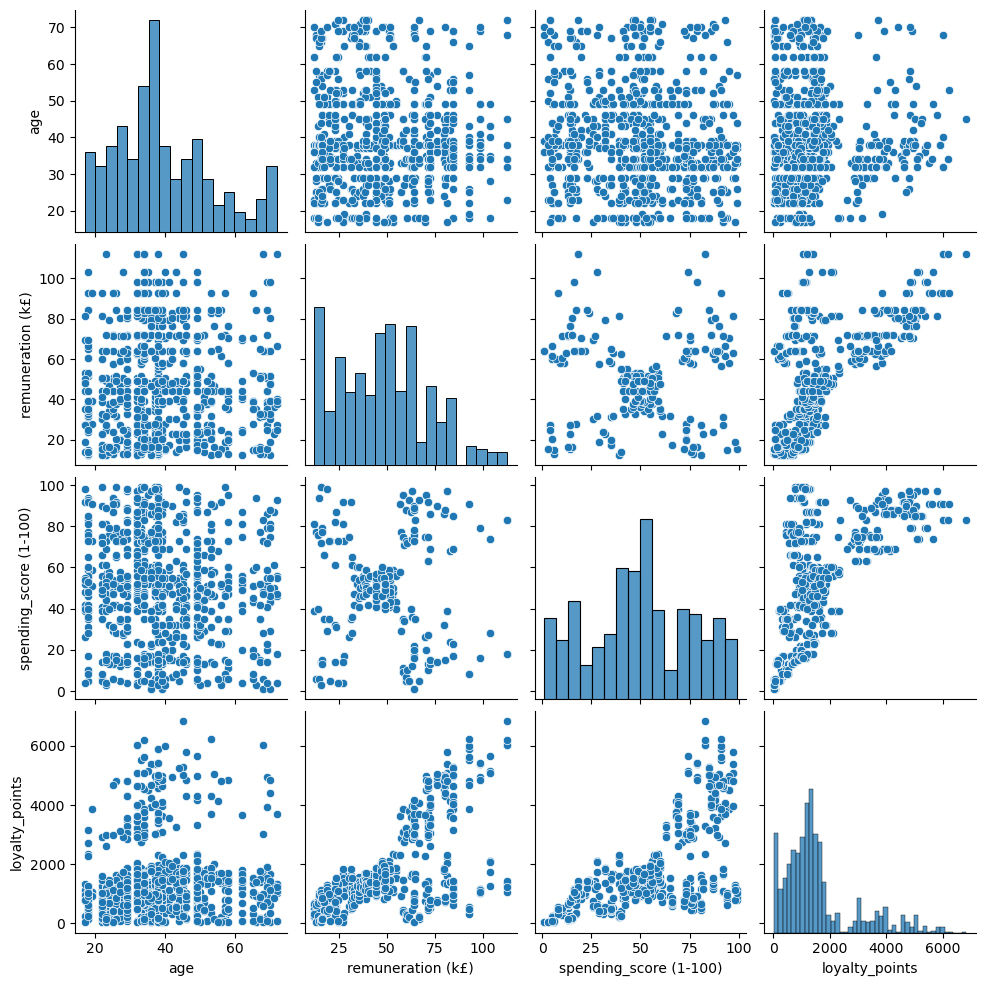

In [5]:
# Visualise a pair plot for the distributions
sns.pairplot(reviews)

# From the plot above, it showed that there is suspectable pattern between the spending scores and the reumuneration. 
- Suggested to check for unlabelled class identification of by the method of K-mean clustering

In [6]:
print("Platform:", reviews["platform"].unique())
print("Gender:", reviews['gender'].unique())
print("Education:", reviews['education'].unique())

Platform: ['Web']
Gender: ['Male' 'Female']
Education: ['graduate' 'PhD' 'diploma' 'postgraduate' 'Basic']


In [7]:
# Gender Distribution
reviews["gender"].value_counts(normalize=True)
# Female group shares around 56% and male group 44% in the samples

Female    0.56
Male      0.44
Name: gender, dtype: float64

In [8]:
# Education Level Distribution
reviews["education"].value_counts(normalize=True)
# The distribution of education level in the samples were 45% of Graduate, 
# 23% of PhD, 20% of Postgraduate, 9.5% of diploma and 2.5% with basic education.

graduate        0.450
PhD             0.230
postgraduate    0.200
diploma         0.095
Basic           0.025
Name: education, dtype: float64

In [9]:
# Check how many unique products in the dataframe
len(reviews['product'].unique())

200

In [10]:
# Descriptive statistics.
reviews.describe()
# The range of the variables age, remuneration, and spending score have similar scale which is ranging from 1 to around 100.

age  remuneration (k£)  spending_score (1-100)  loyalty_points
count  2000.000000        2000.000000             2000.000000     2000.000000
mean     39.495000          48.079060               50.000000     1578.032000
std      13.573212          23.123984               26.094702     1283.239705
min      17.000000          12.300000                1.000000       25.000000
25%      29.000000          30.340000               32.000000      772.000000
50%      38.000000          47.150000               50.000000     1276.000000
75%      49.000000          63.960000               73.000000     1751.250000
max      72.000000         112.340000               99.000000     6847.000000

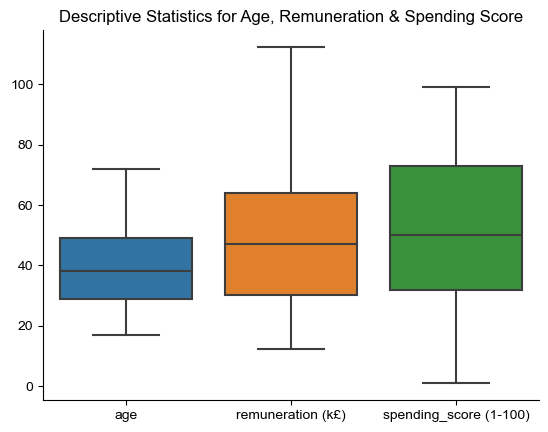

In [11]:
# Visualise the statistic with boxplot
sns.boxplot([reviews['age'],
              reviews['remuneration (k£)'],
              reviews['spending_score (1-100)']])
plt.xticks([0,1,2],['age','remuneration (k£)','spending_score (1-100)'])
plt.title("Descriptive Statistics for Age, Remuneration & Spending Score")
sns.set_style("whitegrid")
sns.despine()


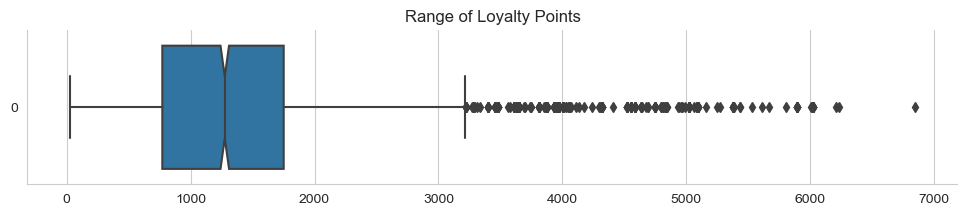

In [12]:
# Visualise the statistic with boxplot
fig,ax = plt.subplots(figsize=(12,2))
sns.boxplot(reviews['loyalty_points'], 
            orient='h', 
            notch=True,
           ).set(title='Range of Loyalty Points')
sns.set_style("whitegrid")
sns.despine()


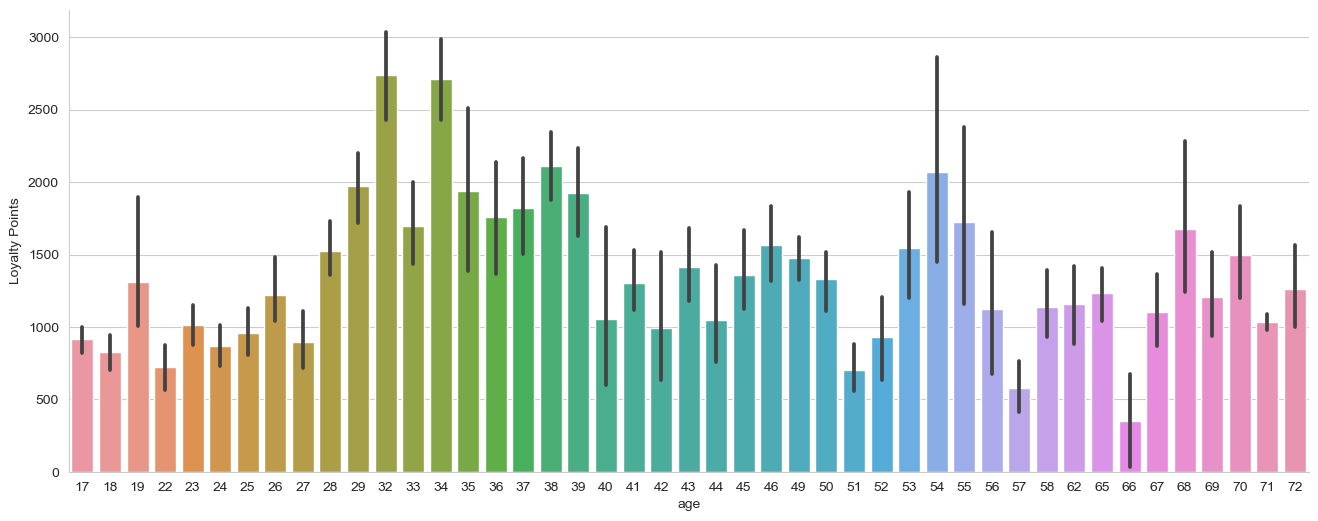

In [13]:
# Visualise the statistic of loyalty_points with boxplot
fig,ax= plt.subplots(figsize=(16,6))
sns.barplot(x="age", y="loyalty_points", data=reviews)
plt.xlabel("age")
plt.ylabel("Loyalty Points")
sns.despine()

In [14]:
cut_bins = [15,20,25,30,35,40,45,50,55,60,65,70,75]
reviews['age_groups']=pd.cut(reviews['age'], bins=cut_bins)
reviews['age_groups'].value_counts().sort_values(ascending =False)

(35, 40]    420
(30, 35]    330
(25, 30]    200
(20, 25]    190
(45, 50]    190
(40, 45]    170
(15, 20]    120
(65, 70]    120
(50, 55]    100
(55, 60]     80
(60, 65]     50
(70, 75]     30
Name: age_groups, dtype: int64

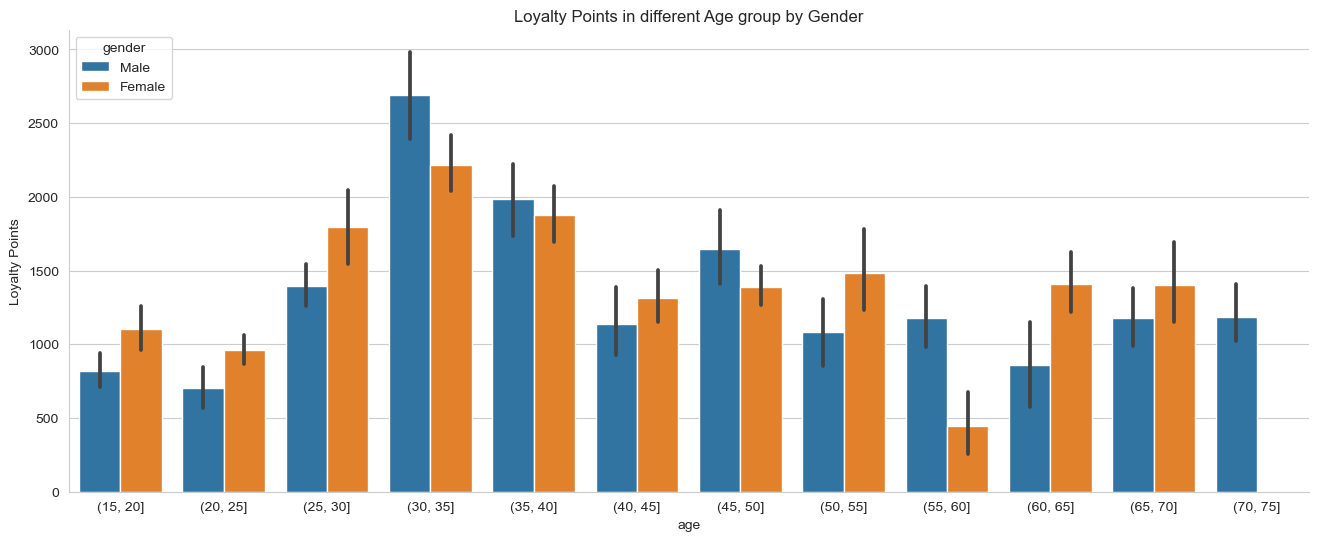

In [15]:
# Visualise the statistic of loyalty_points with boxplot
fig,ax= plt.subplots(figsize=(16,6))
sns.barplot(x="age_groups", y="loyalty_points", hue='gender', data=reviews)
plt.xlabel("age")
plt.ylabel("Loyalty Points")
plt.title("Loyalty Points in different Age group by Gender")
sns.despine()
# The loyalty points is at peak for samples in age group between 30-35, and the second highest is 35-40 and the third is 25-30.
# Therefore we can say that the loyalty points in our sample was observed from age 25-40 years old.

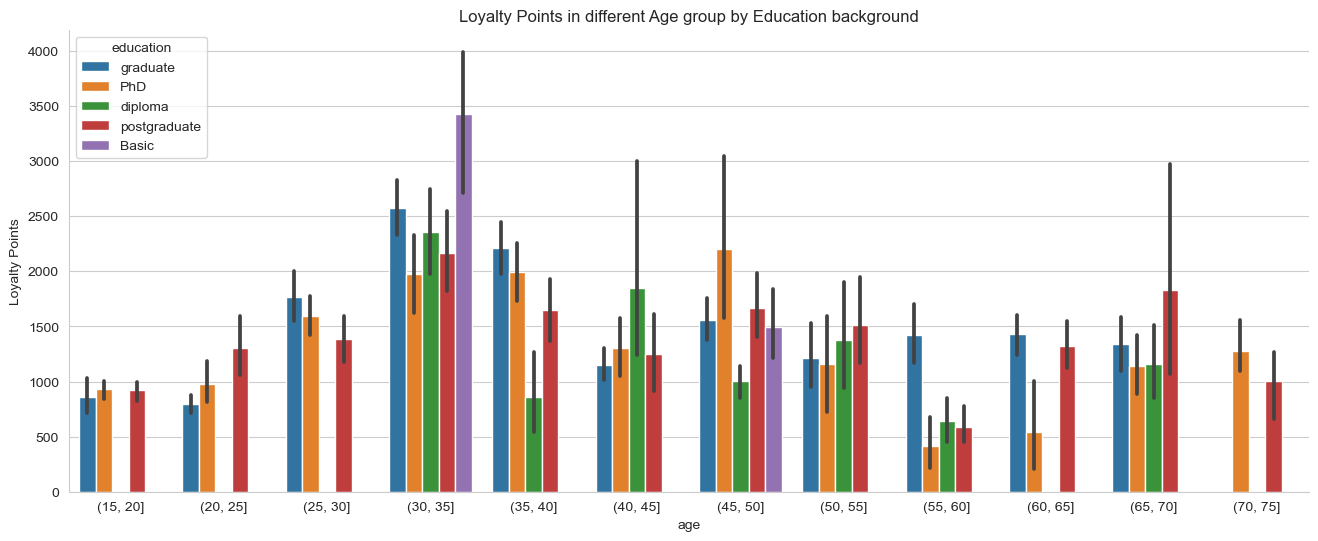

In [16]:
fig,ax= plt.subplots(figsize=(16,6))
sns.barplot(x="age_groups", y="loyalty_points", hue='education', data=reviews)
plt.xlabel("age")
plt.ylabel("Loyalty Points")
plt.title("Loyalty Points in different Age group by Education background")
sns.despine()
# The plot indicated an interesting pattern that the samples whose education background of 'Basic' within age 30-35
# would have highest loyalty points.
# While there is a number of samples with educational background of graduate level or above falls into 15-20 age group.

## 2. Drop columns

In [17]:
# Drop unnecessary columns.
df = reviews.drop(reviews[['language','platform', 'age_groups']],axis=1)
# We would drop the age_group column as it was just used for a helping function to visualise various features
# but not purposed for statistical analysis below.

# View column names.
print(df.columns)
df.info()

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   object 
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


## 3. Rename columns

In [18]:
# Rename the column headers.
new_names = ['gender','age','annual_inc(k£)','sp_score','loyal_pts','edu','product','review','summary']
df.columns = new_names
# View column names.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   annual_inc(k£)  2000 non-null   float64
 3   sp_score        2000 non-null   int64  
 4   loyal_pts       2000 non-null   int64  
 5   edu             2000 non-null   object 
 6   product         2000 non-null   object 
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


## 4. Save the DataFrame as a CSV file

In [19]:
# Create a CSV file as output.
df.to_csv('turtle_game.csv',index=False)

In [20]:
# Import new CSV file with Pandas.
df = pd.read_csv('turtle_game.csv')

# View DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   annual_inc(k£)  2000 non-null   float64
 3   sp_score        2000 non-null   int64  
 4   loyal_pts       2000 non-null   int64  
 5   edu             2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [21]:
# Again the dtype information of product showed it is an integer instead of an "object"
df['product'] = df['product'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   annual_inc(k£)  2000 non-null   float64
 3   sp_score        2000 non-null   int64  
 4   loyal_pts       2000 non-null   int64  
 5   edu             2000 non-null   object 
 6   product         2000 non-null   object 
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 140.8+ KB


## 5. Linear regression

C:\Users\KennethLo\AppData\Local\Temp\ipykernel_8296\2227702692.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(2)


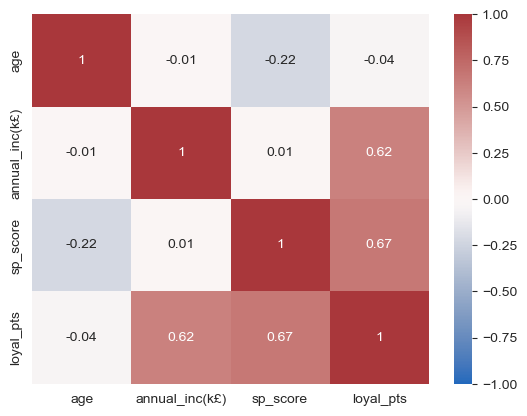

In [22]:
# Check Peason's correlation matrix before linear regression modelling
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
# Correlation between sp_score and annual income is close to 0.

### 5a) spending vs loyalty

In [23]:
# Independent variable.
X1= df['sp_score']
X1= sm.add_constant(X1)
# Dependent variable.
y= df['loyal_pts']

# OLS model and summary.
sp_reg = sm.OLS(y,X1).fit()

# Extract the estimated parameters.
print("Estimated coef:\n", sp_reg.params)

# Extract the standard errors.
print("standard errors:\n", sp_reg.bse)

# Extract the predicted values.
print("Predicted values:\n ",sp_reg.predict())

# Statistics Summary
sp_reg.summary()

Estimated coef:
 const      -75.052663
sp_score    33.061693
dtype: float64
standard errors:
 const       45.930554
sp_score     0.814419
dtype: float64
Predicted values:
  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              loyal_pts   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        20:12:12   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.0527     45.931     -1.634      0.102    -165.129      15.024
sp_score      33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Set the X coefficient and the constant to generate the regression table.
X1_names = X1.columns
coef = sp_reg.params.values
standard_error = sp_reg.bse.values
t = coef/standard_error
p_values = sp_reg.pvalues
data={'coef':coef,
     'standard_error':standard_error,
     't':t,
     'p_values':p_values}

reg_table = pd.DataFrame(data, index=X1_names)
# View the output.
reg_table

coef  standard_error          t       p_values
const    -75.052663       45.930554  -1.634047   1.024066e-01
sp_score  33.061693        0.814419  40.595459  2.916295e-263

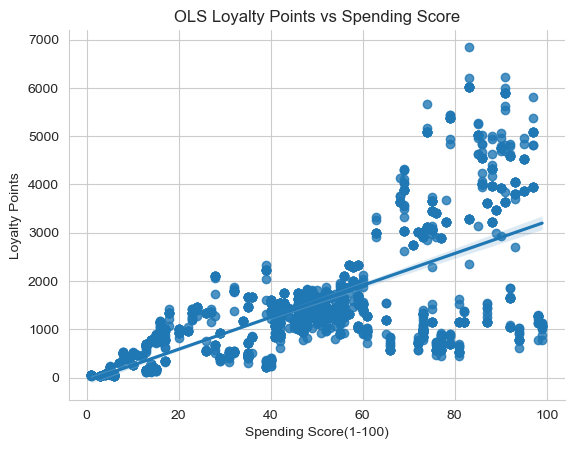

In [25]:
# Plot the graph with a regression line.
sns.regplot(x='sp_score', y='loyal_pts', data=df).set(title="OLS Loyalty Points vs Spending Score")
plt.ylabel("Loyalty Points")
plt.xlabel("Spending Score(1-100)")
sns.despine()

### 5b) renumeration vs loyalty

In [26]:
# Independent variable.
X2 = df['annual_inc(k£)']
X2 = sm.add_constant(X2)
# Dependent variable.
y = df['loyal_pts']

# OLS model and summary.
remun_reg = sm.OLS(y,X2).fit()
remun_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              loyal_pts   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        20:12:13   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -65.6865     52.171     -1.259      0.208    -168.001      36.628
annual_inc(k£)    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Extract the estimated parameters.
print("Estimated coef:\n", remun_reg.params)

# Extract the standard errors.
print("standard errors:\n", remun_reg.bse)

# Extract the predicted values.
print("Predicted values:\n ",remun_reg.predict())

Estimated coef:
 const            -65.686513
annual_inc(k£)    34.187825
dtype: float64
standard errors:
 const             52.170717
annual_inc(k£)     0.977925
dtype: float64
Predicted values:
  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [28]:
# Set the X coefficient and the constant to generate the regression table.
X2_names = X2.columns
coef = remun_reg.params.values
standard_error = remun_reg.bse.values
t = coef/standard_error
p_values = remun_reg.pvalues
data={'coef':coef,
     'standard_error':standard_error,
     't':t,
     'p_values':p_values}

reg_table2 = pd.DataFrame(data, index=X2_names)
# View the output.
reg_table2

coef  standard_error          t       p_values
const          -65.686513       52.170717  -1.259069   2.081526e-01
annual_inc(k£)  34.187825        0.977925  34.959541  2.430175e-209

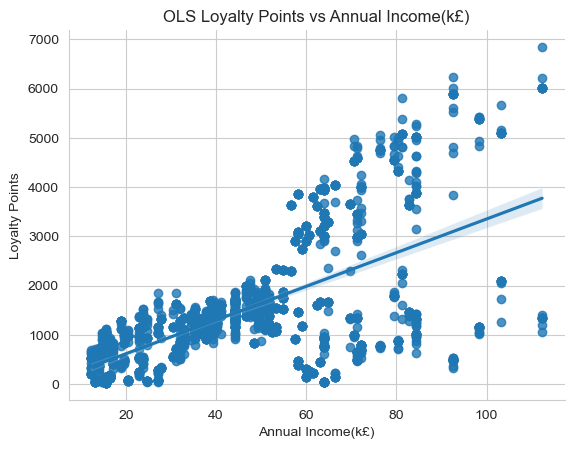

In [29]:
# Plot the graph with a regression line.
sns.regplot(x='annual_inc(k£)', y='loyal_pts', data=df).set(title="OLS Loyalty Points vs Annual Income(k£)")
plt.ylabel("Loyalty Points")
plt.xlabel("Annual Income(k£)")
sns.despine()

### 5c) age vs loyalty

In [30]:
# Independent variable.
X3 = df['age']
X3 = sm.add_constant(X3)
# Dependent variable.
y = df['loyal_pts']

# OLS model and summary.
age_reg = sm.OLS(y,X3).fit()
age_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              loyal_pts   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 24 Jul 2023   Prob (F-statistic):             0.0577
Time:                        20:12:13   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.000    1563.449    1909.587
age           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Extract the estimated parameters.
print("Estimated coef:\n", age_reg.params)

# Extract the standard errors.
print("standard errors:\n", age_reg.bse)

# Extract the predicted values.
print("Predicted values:\n ",age_reg.predict())

Estimated coef:
 const    1736.517739
age        -4.012805
dtype: float64
standard errors:
 const    88.248731
age       2.113177
dtype: float64
Predicted values:
  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [32]:
# Set the X coefficient and the constant to generate the regression table.
X3_names = X3.columns
coef = age_reg.params.values
standard_error = age_reg.bse.values
t = coef/standard_error
p_values = age_reg.pvalues
data={'coef':coef,
     'standard_error':standard_error,
     't':t,
     'p_values':p_values}

reg_table3 = pd.DataFrame(data, index=X3_names)
# View the output.
reg_table3

coef  standard_error          t      p_values
const  1736.517739       88.248731  19.677538  6.192703e-79
age      -4.012805        2.113177  -1.898944  5.771573e-02

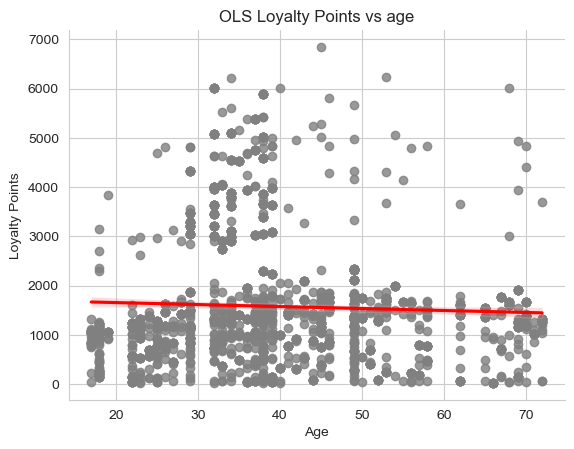

In [33]:
# Plot the graph with a regression line.
sns.regplot(x='age', y='loyal_pts', data=df,
           scatter_kws={"color": "grey"}, 
            line_kws={"color": "red"}).set(title="OLS Loyalty Points vs age")
plt.ylabel("Loyalty Points")
plt.xlabel("Age")
sns.despine()

## 6. Observations and insights

1. The descriptive statistics revealed that the loyalty points in our sample is peaked at 30-35 year-old in which samples with basic educational background dominated.

2. The range between min and max of the loyalty points was quite large, it should be checked if transformation of the variable could give better result of estimation.

3. The plot with Age against education level revealed that there were 120 observations with education level higher than graduate level. There might have some suspectable data quality issues.

4.  Correlation between sp_score and annual income is close to 0.

5. There were observed trends between the loyal points with spending scores and remuneration; while the age did not look to have a linear correlation with loyalty points as the R-square of the simple regression was too low.

6. The plot indicated an interesting pattern that the samples whose education background of 'Basic' within age 30-35 would have highest loyalty points.

7. While there is a number of samples with educational background of graduate level or above falls into 15-20 age group. Generally speaking, the age at which most people receive their PhD varies from person to person, but typically falls between the mid-twenties and early thirties.
8. Observed clusters between annual income and spending scores was noticed.

# How customers accumulate loyalty points
- From the meta data, it is defined as a score based on the point value of the purchase,converting the monetary value to point value, and the point value of an action (purchase).
- Since a purchase of any goods would be influenced by the spending behavior as well as the income level of any individual, which could be assumed in our model with the given information in our samples. 


# how useful are remuneration and spending scores data:
- From the simple linear regression analysis, it has been shown that the remuneration and spending scores data were highly correlated the loyalty points, because both data shows statistically significant at 1% significant level.
- As shown in the simple regression models, the coefficients of the independent variables are both positve, sp_score(33.0617), remuneration(34.187825), meaning that the loyalty points are with these two variables.
- A thousand pound increase of annual income would increase the loyalty points of 34.19 while one point spending score increase would increase 33.06 loyalty points.


# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [34]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('review_transformed.csv')

# View DataFrame.
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   annual_inc(k£)  2000 non-null   float64
 3   sp_score        2000 non-null   int64  
 4   loyal_pts       2000 non-null   int64  
 5   edu             2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   log(loyal)      2000 non-null   float64
 10  log(income)     2000 non-null   float64
 11  log(spending)   2000 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 187.6+ KB


gender  age  annual_inc(k£)  sp_score  loyal_pts       edu  product  \
0    Male   18           12.30        39        210  graduate      453   
1    Male   23           12.30        81        524  graduate      466   
2  Female   22           13.12         6         40  graduate      254   
3  Female   25           13.12        77        562  graduate      263   
4  Female   33           13.94        40        366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  log(loyal)  log(income)  \
0  The fact that 50% of this space is wasted on a...    5.347108     2.509599   
1  Another worthless Dungeon Master's screen from...    6.261492     2.509599   
2                    pretty, but also pretty useless    3.688879     2.574138   
3                                         Five Stars    6.331502     2.574138   
4                                         Money trap    5.902633     2.634762   

   log(spending)  
0       3.663562  
1       4.394449  
2       1.791759  
3       4.343805  
4       3.688879

In [36]:
# Drop unnecessary columns.
df3 = df2[['sp_score','annual_inc(k£)']]

# View DataFrame.
df3

sp_score  annual_inc(k£)
0           39           12.30
1           81           12.30
2            6           13.12
3           77           13.12
4           40           13.94
...        ...             ...
1995        69           84.46
1996         8           92.66
1997        91           92.66
1998        16           98.40
1999         8           92.66

[2000 rows x 2 columns]

In [37]:
# Explore the data.
df3.isna().sum()

sp_score          0
annual_inc(k£)    0
dtype: int64

In [38]:
# Descriptive statistics.
df3.describe()

sp_score  annual_inc(k£)
count  2000.000000     2000.000000
mean     50.000000       48.079060
std      26.094702       23.123984
min       1.000000       12.300000
25%      32.000000       30.340000
50%      50.000000       47.150000
75%      73.000000       63.960000
max      99.000000      112.340000

## 2. Plot

[Text(0.5, 1.0, 'Pattern between Annual Income & Spending Scores')]

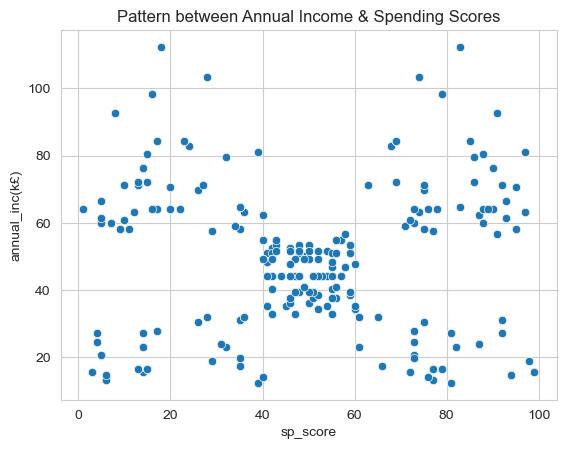

In [39]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='sp_score', y='annual_inc(k£)', data=df3).set(title="Pattern between Annual Income & Spending Scores")

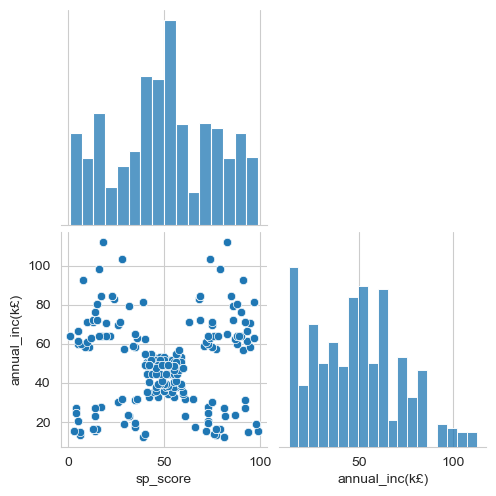

In [40]:
# Create a pairplot with Seaborn.
sns.pairplot(df3, corner=True)

## 3. Elbow and silhoutte methods

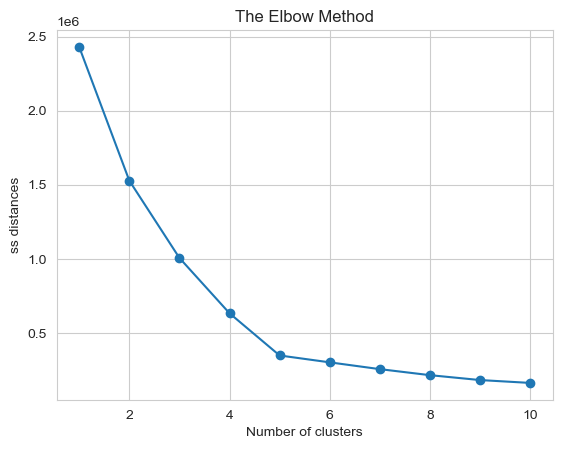

In [41]:
# Determine the number of clusters: Elbow method.
X=df3[['sp_score','annual_inc(k£)']]
# Elbow chart for us to decide on the number of clusters
ss=[]
for i in range(1,11):
    # class KMeans(_BaseKMeans)
    # KMeans(n_clusters=8, *, 
            # init='k-means++',
            # n_init='warn',
            # max_iter=300, 
            # tol=0.0001,
            # verbose=0, 
            # random_state=None,
            # copy_x=True,
            # algorithm='lloyd')
    kmeans = KMeans(n_clusters=i,
                    init = 'k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    ss.append(kmeans.inertia_)

# Plot the elbow method. Plots the sum of squared distances from each point to its assigned center
plt.plot(range(1,11),
         ss,
         marker='o')
# Insert labels and title
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('ss distances')
plt.show()

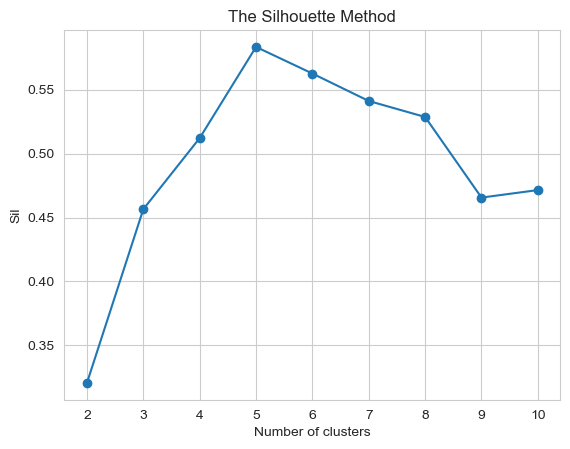

In [42]:
# Determine the number of clusters: Silhouette method.
# find the range of clusters to be used using silhoutte method
sil = []
kmax=10
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(X)
    labels = kmeans_s.labels_ # labels_ : ndarray of shape (n_samples,) Labels of each point
    sil.append(silhouette_score(X,
                               labels,
                               metric = 'euclidean'))
 # Plot the silhouette method
plt.plot(range(2,kmax+1),
         sil,
         marker ='o')
# Insert labels and title
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

## 4. Evaluate k-means model at different values of *k*

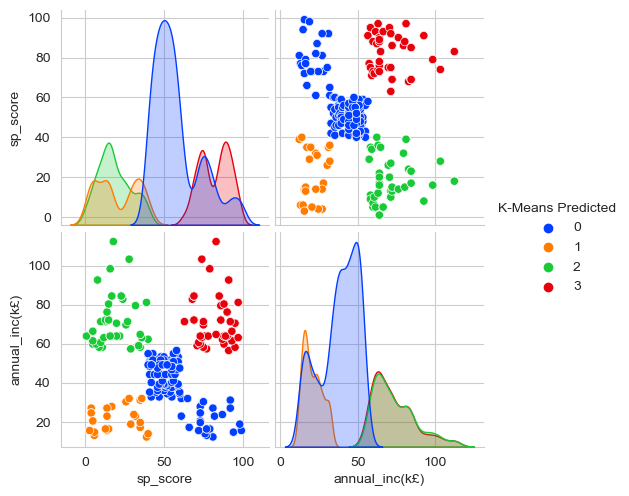

In [43]:
# Both Elbow method and Silhouette Method suggest 5 clusters in the dataset,
# Let's start with 4
kmeans_4 = KMeans(n_clusters = 4,
               max_iter =15000,
               init = 'k-means++',
               random_state= 0).fit(X)

clusters = kmeans_4.labels_
X['K-Means Predicted'] = clusters
# Plot the predicted
sns.pairplot(X,
            hue = 'K-Means Predicted',
            diag_kind = 'kde',
            palette='bright')

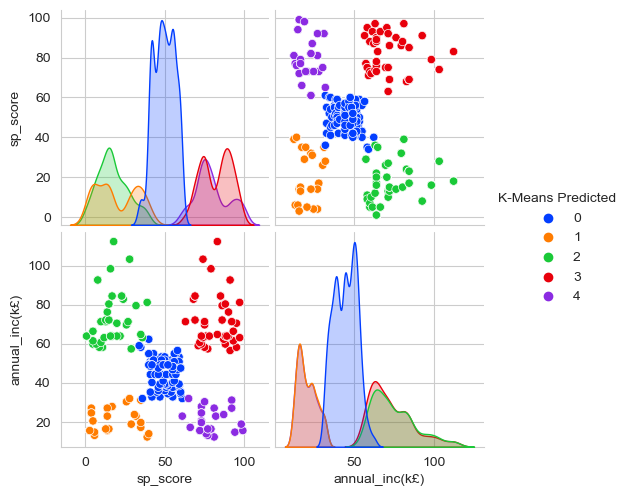

In [44]:
# And then 5 clusters
kmeans_5 = KMeans(n_clusters = 5,
               max_iter =15000,
               init = 'k-means++',
               random_state= 0).fit(X)

clusters = kmeans_5.labels_
X['K-Means Predicted'] = clusters
# Plot the predicted
sns.pairplot(X,
            hue = 'K-Means Predicted',
            diag_kind = 'kde', 
            palette='bright')

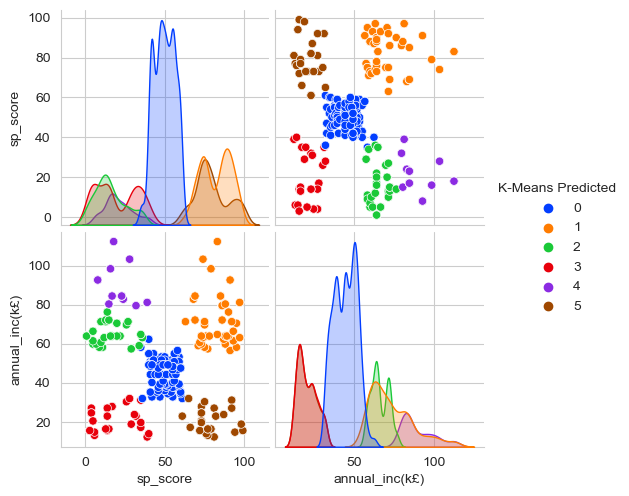

In [45]:
kmeans_6 = KMeans(n_clusters = 6,
               max_iter =15000,
               init = 'k-means++',
               random_state= 0).fit(X)

clusters = kmeans_6.labels_
X['K-Means Predicted'] = clusters
# Plot the predicted
sns.pairplot(X,
            hue = 'K-Means Predicted',
            diag_kind = 'kde',
            palette='bright')

## 5. Fit final model and justify your choice

In [46]:
# Apply the final model.
groups = pd.DataFrame(kmeans_5.labels_, columns=["cluster_class"])
review_fin = pd.concat([df2, groups], axis=1)
review_fin.head()

gender  age  annual_inc(k£)  sp_score  loyal_pts       edu  product  \
0    Male   18           12.30        39        210  graduate      453   
1    Male   23           12.30        81        524  graduate      466   
2  Female   22           13.12         6         40  graduate      254   
3  Female   25           13.12        77        562  graduate      263   
4  Female   33           13.94        40        366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  log(loyal)  log(income)  \
0  The fact that 50% of this space is wasted on a...    5.347108     2.509599   
1  Another worthless Dungeon Master's screen from...    6.261492     2.509599   
2                    pretty, but also pretty useless    3.688879     2.574138   
3                                         Five Stars    6.331502     2.574138   
4                                         Money trap    5.902633     2.634762   

   log(spending)  cluster_class  
0       3.663562              1  
1       4.394449              4  
2       1.791759              1  
3       4.343805              4  
4       3.688879              1

In [47]:
# Check the number of observations per predicted class.
review_fin['cluster_class'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: cluster_class, dtype: int64

## 6. Plot and interpret the clusters

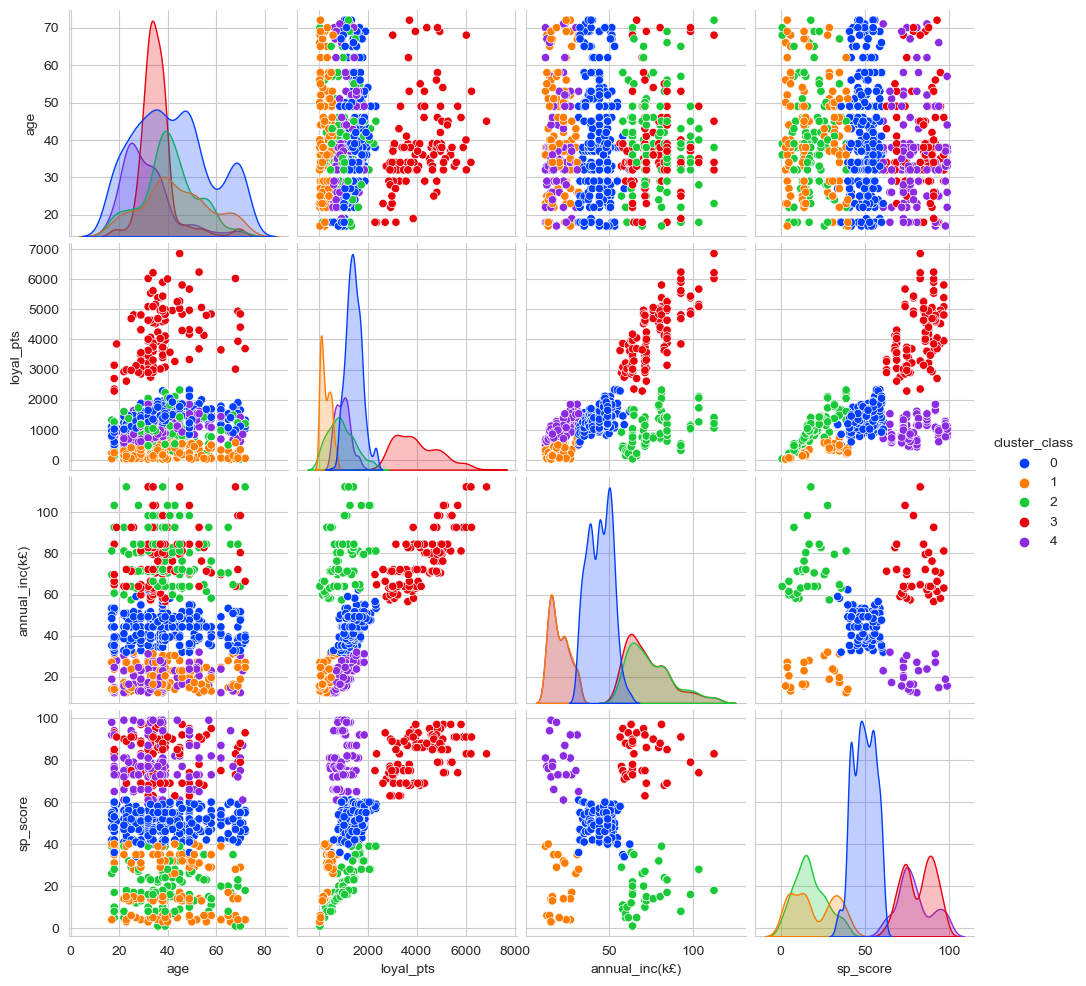

In [48]:
# Visualising the clusters.
sns.color_palette(palette='bright')
sns.pairplot(review_fin,
             vars= ['age','loyal_pts','annual_inc(k£)','sp_score'],
             hue='cluster_class',
            palette='bright')


In [49]:
# View the Dataframe
cluster0 = review_fin[review_fin['cluster_class']==0][['age','annual_inc(k£)','sp_score','loyal_pts']]     
cluster1 = review_fin[review_fin['cluster_class']==1][['age','annual_inc(k£)','sp_score','loyal_pts']]    
cluster2 = review_fin[review_fin['cluster_class']==2][['age','annual_inc(k£)','sp_score','loyal_pts']]    
cluster3 = review_fin[review_fin['cluster_class']==3][['age','annual_inc(k£)','sp_score','loyal_pts']]    
cluster4 = review_fin[review_fin['cluster_class']==4][['age','annual_inc(k£)','sp_score','loyal_pts']]    

In [50]:
print("Cluster0's Mean:\n", cluster0.mean())
print("\nCluster1's Mean:\n", cluster1.mean())
print("\nCluster2's Mean:\n", cluster2.mean())
print("\nCluster3's Mean:\n", cluster3.mean())
print("\nCluster4's Mean:\n", cluster4.mean())
# The mean loyalty points is highest in cluster 3, in which the average spending score is also highest
# amongst the others, with an average age 35.

Cluster0's Mean:
 age                 42.129199
annual_inc(k£)      44.418786
sp_score            49.529716
loyal_pts         1420.382429
dtype: float64

Cluster1's Mean:
 age                43.505535
annual_inc(k£)     20.424354
sp_score           19.763838
loyal_pts         275.059041
dtype: float64

Cluster2's Mean:
 age                40.666667
annual_inc(k£)     74.831212
sp_score           17.424242
loyal_pts         911.760606
dtype: float64

Cluster3's Mean:
 age                 35.592697
annual_inc(k£)      73.240281
sp_score            82.008427
loyal_pts         3988.238764
dtype: float64

Cluster4's Mean:
 age                31.602230
annual_inc(k£)     20.353680
sp_score           79.416357
loyal_pts         971.944238
dtype: float64


In [121]:
cluster3.describe()

age  annual_inc(k£)    sp_score    loyal_pts
count  356.000000  356.000000      356.000000  356.000000 
mean   35.592697   73.240281       82.008427   3988.238764
std    7.299612    13.557856       9.342765    898.409322 
min    18.000000   56.580000       63.000000   2289.000000
25%    32.000000   63.140000       74.000000   3218.000000
50%    34.000000   71.340000       83.000000   3866.000000
75%    38.000000   81.180000       90.000000   4635.000000
max    72.000000   112.340000      97.000000   6847.000000

## 7. Discuss: Insights and observations

- The scatterplot with the classification identified by kmeans method illustrated an improved pattern with loyalty points against all variables.


In [51]:
# Save the file to csv
review_fin.to_csv('review_fin.csv', index=False)

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [52]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [53]:
# Load the data set as df4.
df4 = pd.read_csv('review_fin.csv')

# View DataFrame.
df4.head()

gender  age  annual_inc(k£)  sp_score  loyal_pts       edu  product  \
0    Male   18           12.30        39        210  graduate      453   
1    Male   23           12.30        81        524  graduate      466   
2  Female   22           13.12         6         40  graduate      254   
3  Female   25           13.12        77        562  graduate      263   
4  Female   33           13.94        40        366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  log(loyal)  log(income)  \
0  The fact that 50% of this space is wasted on a...    5.347108     2.509599   
1  Another worthless Dungeon Master's screen from...    6.261492     2.509599   
2                    pretty, but also pretty useless    3.688879     2.574138   
3                                         Five Stars    6.331502     2.574138   
4                                         Money trap    5.902633     2.634762   

   log(spending)  cluster_class  
0       3.663562              1  
1       4.394449              4  
2       1.791759              1  
3       4.343805              4  
4       3.688879              1

In [54]:
# Explore data set.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   annual_inc(k£)  2000 non-null   float64
 3   sp_score        2000 non-null   int64  
 4   loyal_pts       2000 non-null   int64  
 5   edu             2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
 9   log(loyal)      2000 non-null   float64
 10  log(income)     2000 non-null   float64
 11  log(spending)   2000 non-null   float64
 12  cluster_class   2000 non-null   int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 203.2+ KB


In [55]:
# Keep necessary columns. Drop unnecessary columns.
texts = pd.DataFrame(df4, columns=['summary', 'review'])

# View DataFrame.
texts.head()

summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   
3                                         Five Stars   
4                                         Money trap   

                                              review  
0  When it comes to a DM's screen, the space on t...  
1  An Open Letter to GaleForce9*:\n\nYour unpaint...  
2  Nice art, nice printing.  Why two panels are f...  
3  Amazing buy! Bought it as a gift for our new d...  
4  As my review of GF9's previous screens these w...

In [56]:
# Determine if there are any missing values.
texts.isna().sum()

summary    0
review     0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [57]:
# Review: Change all to lower case and join with a space.
review_lcase = [string.lower() for string in texts['review']]
review_lcase = pd.DataFrame(review_lcase,columns=['review'])
review_lcase.head()

review
0  when it comes to a dm's screen, the space on t...
1  an open letter to galeforce9*:\n\nyour unpaint...
2  nice art, nice printing.  why two panels are f...
3  amazing buy! bought it as a gift for our new d...
4  as my review of gf9's previous screens these w...

In [58]:
# Summary: Change all to lower case and join with a space.
summary_lcase = [string.lower() for string in texts['summary']]
summary_lcase = pd.DataFrame(summary_lcase, columns=['summary'])
summary_lcase.head()

summary
0  the fact that 50% of this space is wasted on a...
1  another worthless dungeon master's screen from...
2                    pretty, but also pretty useless
3                                         five stars
4                                         money trap

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [59]:
# Replace all the punctuations in review column.
review_fin=pd.DataFrame([re.sub(r'[^\w\s]',"", i) for i in review_lcase['review']], columns=['review'])

# View output.
print(review_fin.shape)
review_fin.head()

(2000, 1)


review
0  when it comes to a dms screen the space on the...
1  an open letter to galeforce9\n\nyour unpainted...
2  nice art nice printing  why two panels are fil...
3  amazing buy bought it as a gift for our new dm...
4  as my review of gf9s previous screens these we...

In [60]:
# Replace all the puncuations in summary column.
# Replace all the punctuations in review column.
summary_fin=pd.DataFrame([re.sub(r'[^\w\s]',"", i) for i in summary_lcase['summary']], columns=['summary'])

# View output.
print(summary_fin.shape)
summary_fin.head()



(2000, 1)


summary
0  the fact that 50 of this space is wasted on ar...
1  another worthless dungeon masters screen from ...
2                     pretty but also pretty useless
3                                         five stars
4                                         money trap

### 2c) Drop duplicates in both columns

In [61]:
# Drop duplicates in both columns.
review_fin =review_fin[review_fin['review'].duplicated()==False].reset_index(drop=True)
# View DataFrame.
review_fin.head()

review
0  when it comes to a dms screen the space on the...
1  an open letter to galeforce9\n\nyour unpainted...
2  nice art nice printing  why two panels are fil...
3  amazing buy bought it as a gift for our new dm...
4  as my review of gf9s previous screens these we...

In [62]:
# Drop duplicates in both columns.
summary_fin =summary_fin[summary_fin['summary'].duplicated()==False].reset_index(drop=True)
# View DataFrame.
print(summary_fin.shape)
summary_fin.head()

(1351, 1)


summary
0  the fact that 50 of this space is wasted on ar...
1  another worthless dungeon masters screen from ...
2                     pretty but also pretty useless
3                                         five stars
4                                         money trap

## 3. Tokenise and create wordclouds

In [63]:
# Apply tokenisation to both columns.
tokens_r = review_fin['review'].apply(word_tokenize)
tokens_s = summary_fin['summary'].apply(word_tokenize)
# View DataFrame.
tokens_r

0       [when, it, comes, to, a, dms, screen, the, spa...
1       [an, open, letter, to, galeforce9, your, unpai...
2       [nice, art, nice, printing, why, two, panels, ...
3       [amazing, buy, bought, it, as, a, gift, for, o...
4       [as, my, review, of, gf9s, previous, screens, ...
                              ...                        
1945    [we, are, retired, and, find, this, a, great, ...
1946    [the, perfect, word, game, for, mixed, ages, w...
1947    [great, game, did, not, think, i, would, like,...
1948    [great, game, for, all, keeps, the, mind, nimble]
1949    [this, game, is, fun, a, lot, like, scrabble, ...
Name: review, Length: 1950, dtype: object

In [64]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(review_fin.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + review_fin['review'][i]
all_reviews

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9\n\nyour unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which coul

In [65]:
import seaborn as sns

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_review = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

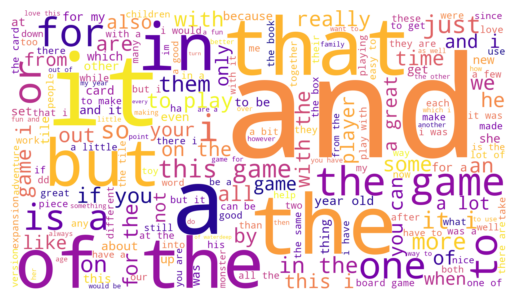

In [66]:
# Review: Plot the WordCloud image.
plt.imshow(word_cloud_review, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
# Summary: Create a word cloud.
all_summaries = ''

for j in range(summary_fin.shape[0]):
    # Add each comment.
    all_summaries = all_summaries + summary_fin['summary'][j]

    

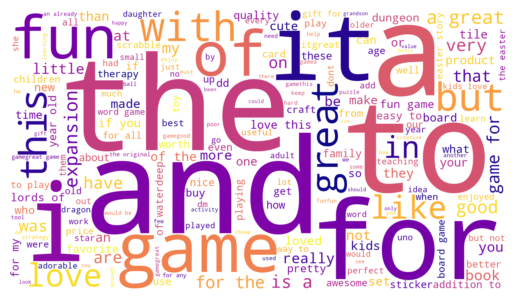

In [68]:
# Summary: Plot the WordCloud image.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summaries) 

# Review: Plot the WordCloud image.
plt.imshow(word_cloud_summary, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [69]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist
all_tokens_r =[]
all_tokens_s =[]
for i in range(tokens_r.shape[0]):
    # Add each token to the list.
    all_tokens_r = all_tokens_r + tokens_r[i]

for i in range(tokens_s.shape[0]):
    # Add each token to the list.
    all_tokens_s = all_tokens_s + tokens_s[i]
    
freq_review1 = FreqDist(all_tokens_r)
freq_review2 = FreqDist(all_tokens_s)

# Preview data
freq_review1
freq_review2

FreqDist({'game': 268, 'the': 258, 'a': 238, 'great': 237, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [70]:
# Delete all the alpanum.
tokens1 = [word for word in all_tokens_r if word.isalnum()]
tokens2 = [word for word in all_tokens_s if word.isalnum()]

In [71]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))

tokens1_cleaned = [word for word in tokens1 if word not in english_stopwords]
tokens2_cleaned = [word for word in tokens2 if word not in english_stopwords]
# Define an empty string variable.
tokens1_string = ''
tokens2_string = ''

for value1 in tokens1_cleaned:
    # Add each filtered token word to the string.
    tokens1_string = tokens1_string + value1 + ' '

for value2 in tokens2_cleaned:
    tokens2_string = tokens2_string + value2 + ' '

# Preview the data
print(tokens1_string)
print(tokens2_string)



comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgott

### 4c) Create wordcloud without stopwords

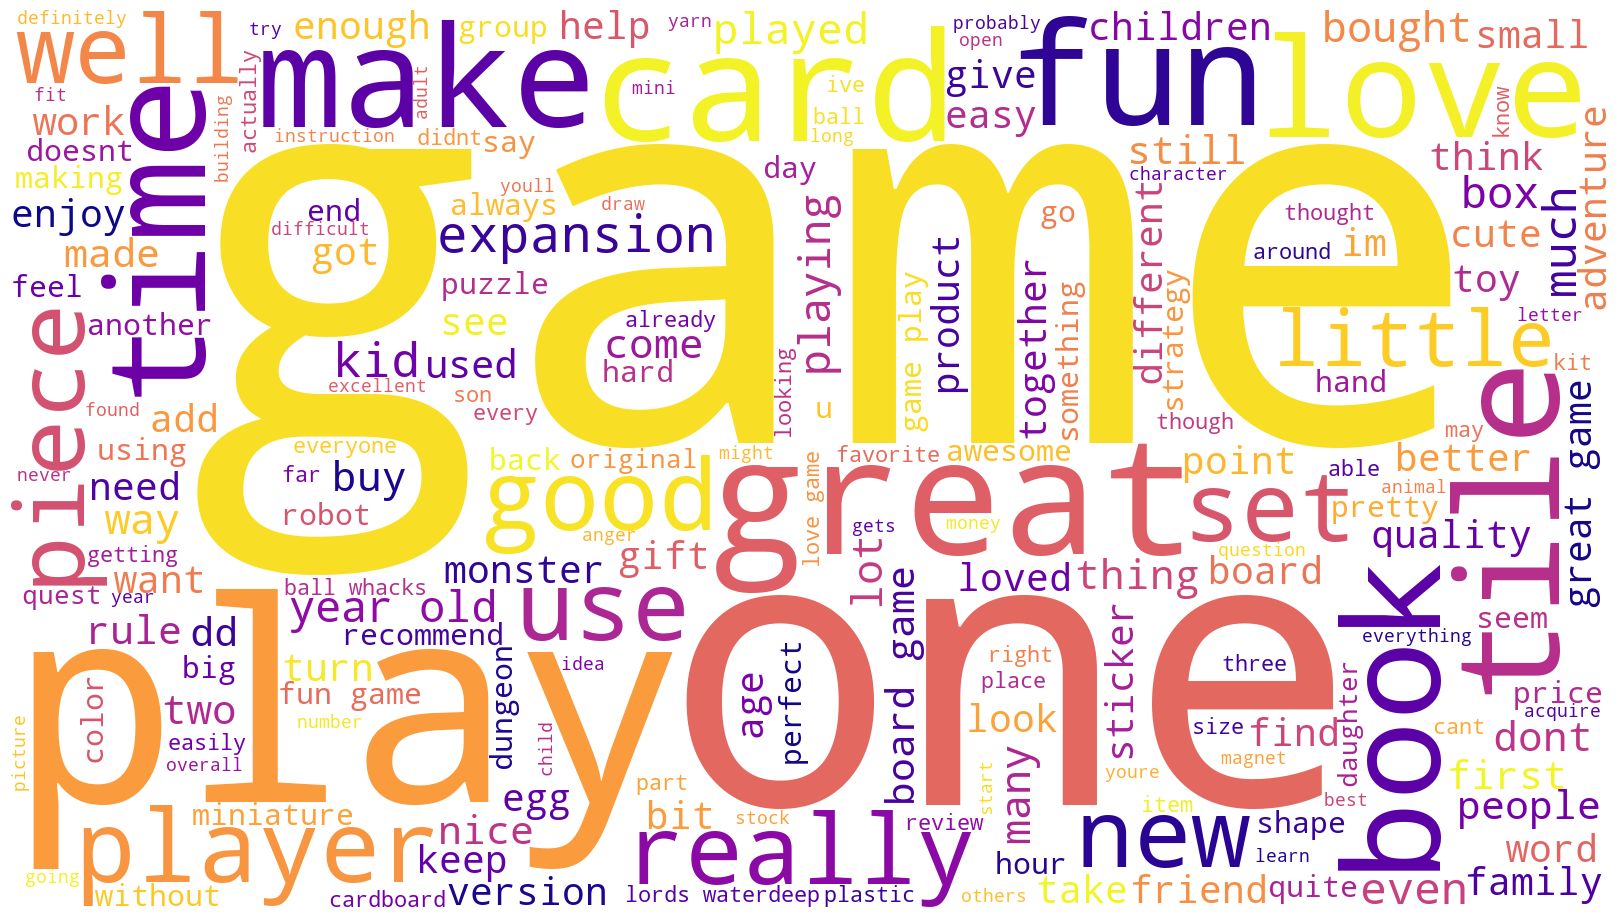

In [72]:
# Create a wordcloud without stop words for the review.

# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens1_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



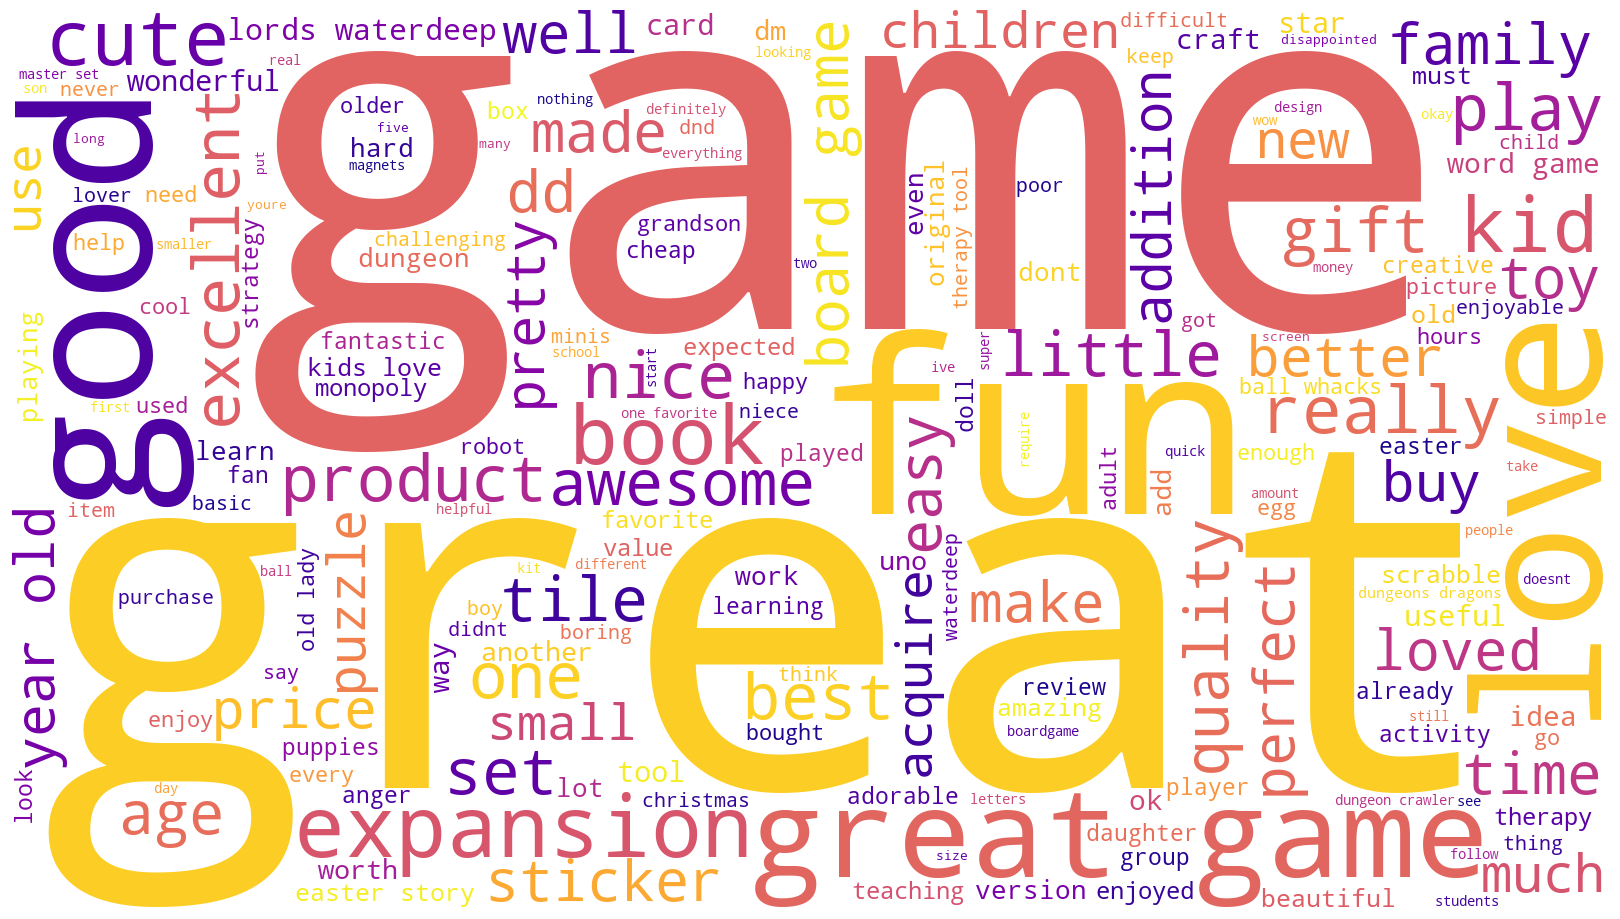

In [73]:
# Create a wordcloud without stop words for the summary.

# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



### 4d) Identify 15 most common words and polarity

[Text(0.5, 1.0, 'Word Frequency appearing in Review')]

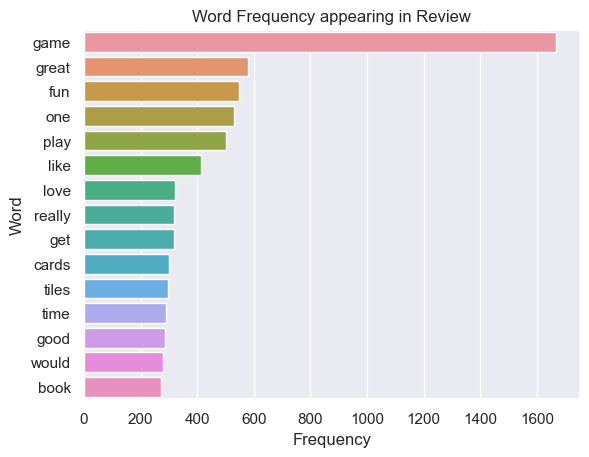

In [74]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter.
counts1 = pd.DataFrame(Counter(tokens1_cleaned).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sns.barplot(x='Frequency', y=counts1.index, data=counts1).set(title='Word Frequency appearing in Review')


[Text(0.5, 1.0, 'Word Frequency appearing in Summary')]

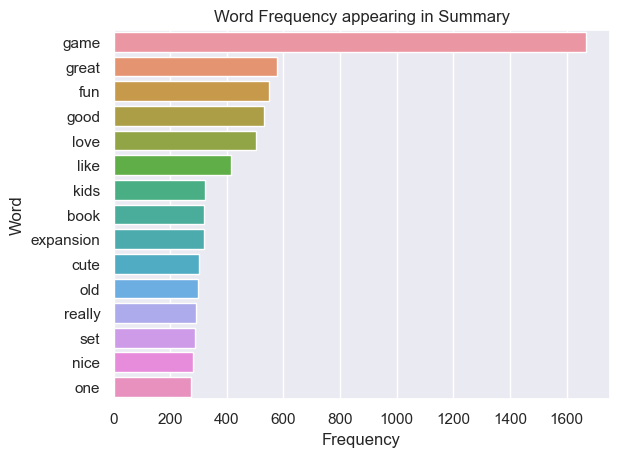

In [75]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(tokens2_cleaned).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
# Preview data.
sns.barplot(x='Frequency', y=counts2.index, data=counts1).set(title='Word Frequency appearing in Summary')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [76]:
df4.head()

gender  age  annual_inc(k£)  sp_score  loyal_pts       edu  product  \
0    Male   18           12.30        39        210  graduate      453   
1    Male   23           12.30        81        524  graduate      466   
2  Female   22           13.12         6         40  graduate      254   
3  Female   25           13.12        77        562  graduate      263   
4  Female   33           13.94        40        366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  log(loyal)  log(income)  \
0  The fact that 50% of this space is wasted on a...    5.347108     2.509599   
1  Another worthless Dungeon Master's screen from...    6.261492     2.509599   
2                    pretty, but also pretty useless    3.688879     2.574138   
3                                         Five Stars    6.331502     2.574138   
4                                         Money trap    5.902633     2.634762   

   log(spending)  cluster_class  
0       3.663562              1  
1       4.394449              4  
2       1.791759              1  
3       4.343805              4  
4       3.688879              1

In [77]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [78]:
# Determine polarity of both columns. 
df4['tblob(review)']=[generate_polarity(i) for i in df4['review']]
df4['tblob(summary)']=[generate_polarity(i) for i in df4['summary']]                                         
# View output.
df4.head()

gender  age  annual_inc(k£)  sp_score  loyal_pts       edu  product  \
0    Male   18           12.30        39        210  graduate      453   
1    Male   23           12.30        81        524  graduate      466   
2  Female   22           13.12         6         40  graduate      254   
3  Female   25           13.12        77        562  graduate      263   
4  Female   33           13.94        40        366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  log(loyal)  log(income)  \
0  The fact that 50% of this space is wasted on a...    5.347108     2.509599   
1  Another worthless Dungeon Master's screen from...    6.261492     2.509599   
2                    pretty, but also pretty useless    3.688879     2.574138   
3                                         Five Stars    6.331502     2.574138   
4                                         Money trap    5.902633     2.634762   

   log(spending)  cluster_class  tblob(review)  tblob(summary)  
0       3.663562              1      -0.036111            0.15  
1       4.394449              4       0.035952           -0.80  
2       1.791759              1       0.116640            0.00  
3       4.343805              4       0.628788            0.00  
4       3.688879              1      -0.316667            0.00

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [79]:
pd.set_option ('display.max_colwidth', -1)
# Top 20 negative summaries.
tblob_neg_20=df4.sort_values(by='tblob(review)', ascending=True)[["tblob(review)","review"]].head(20)


In [80]:
pd.set_option ('display.max_colwidth', -1)
# Top 20 positive reviews.
tblob_pos_20 = df4.sort_values(by='tblob(review)', ascending=False)[["tblob(review)","review"]].head(20)

# View output.
tblob_pos_20

tblob(review)  \
804   1.0             
418   1.0             
44    1.0             
933   1.0             
1168  1.0             
55    1.0             
1177  1.0             
1967  1.0             
1182  1.0             
216   1.0             
474   1.0             
1726  1.0             
1544  1.0             
621   1.0             
620   1.0             
194   1.0             
496   1.0             
609   1.0             
1301  1.0             
1602  1.0             

                                                                                                    review  
804   great!!                                                                                               
418   Great resource for BHIS care coordinators!! Works well with kids and teens on what it says it does!!  
44    Absolutely great pictures even before coloring!                                                       
933   Awesome                                                                                               
1168  best set. buy 2 if you have the means.                                                                
55    Great!                                                                                                
1177  Awesome addition to my rpg GM system.                                                                 
1967  Perfect for tutoring my grandson in spelling.                                                         
1182  My grandson loved it!!                                                                                
216   Great product!  Arrived on time.                                                                      
474   Great Seller!!! Happy with my purchase!!! 5 starrrr                                                   
1726  Excellent toy to simulate thought!                                                                    
1544  Great!                                                                                                
621   Wonderful for my grandson to learn the resurrection story.                                            
620   Great Easter gift for kids!                                                                           
194   Awesome gift                                                                                          
496   Excellent activity for teaching self-management skills!                                               
609   Delightful product!                                                                                   
1301  It's awesome                                                                                          
1602  Great doll to go with the book & animals! Can't wait to read book with the doll to the grandkids!

In [81]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

In [82]:
sia = [sia.polarity_scores(i) for i in df4['review']]
sentiment_sia = pd.DataFrame(sia)
df4['vader_sentiment']= sentiment_sia['compound']
df4.head()

gender  age  annual_inc(k£)  sp_score  loyal_pts       edu  product  \
0  Male    18   12.30           39        210        graduate  453       
1  Male    23   12.30           81        524        graduate  466       
2  Female  22   13.12           6         40         graduate  254       
3  Female  25   13.12           77        562        graduate  263       
4  Female  33   13.94           40        366        graduate  291       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
0  When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1  An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the "Storm King's Thunder" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table 

In [83]:
# View the top 20 vader sentiment reviews
df4.sort_values(by='vader_sentiment', ascending=True)[['tblob(review)','vader_sentiment','review']].head(20)

tblob(review)  vader_sentiment  \
1119 -0.018524      -0.9877            
1559  0.146973      -0.9730            
281  -0.180952      -0.9520            
363  -0.126190      -0.9349            
1015 -0.024755      -0.9300            
901   0.097902      -0.9300            
459  -0.120833      -0.9238            
322  -0.050749      -0.9200            
1069  0.069391      -0.9081            
882  -0.305556      -0.9052            
899  -0.131364      -0.8984            
793  -0.046364      -0.8852            
1797  0.157093      -0.8806            
347  -0.452500      -0.8762            
852   0.020539      -0.8689            
506  -0.058333      -0.8668            
1728  0.053333      -0.8548            
1670  0.147273      -0.8518            
359  -0.237083      -0.8347            
247  -0.350000      -0.8211            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

[Text(0.5, 1.0, 'Sentiment Score (Vader)')]

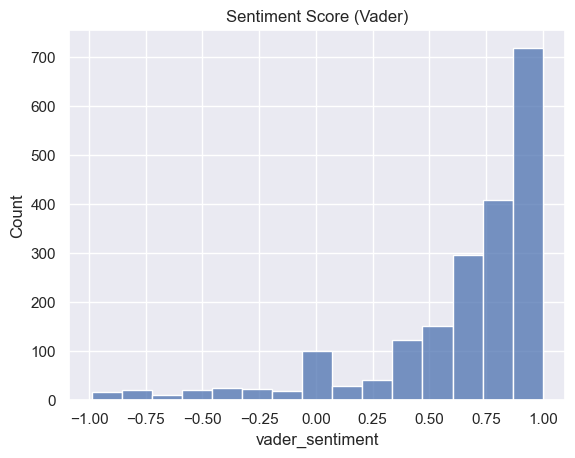

In [84]:
sns.histplot(df4['vader_sentiment'], bins=15).set(title='Sentiment Score (Vader)')

In [85]:
pos_sentiment = df4.sort_values(by='tblob(review)', ascending=False)[['tblob(review)','vader_sentiment','review']].head(20)
pos_sentiment

tblob(review)  vader_sentiment  \
804   1.0            0.6892            
418   1.0            0.8902            
44    1.0            0.6893            
933   1.0            0.6249            
1168  1.0            0.6369            
55    1.0            0.6588            
1177  1.0            0.6249            
1967  1.0            0.5719            
1182  1.0            0.6688            
216   1.0            0.6588            
474   1.0            0.8741            
1726  1.0            0.6114            
1544  1.0            0.6588            
621   1.0            0.5719            
620   1.0            0.8070            
194   1.0            0.7906            
496   1.0            0.6114            
609   1.0            0.6239            
1301  1.0            0.6249            
1602  1.0            0.6892            

                                                                                                    review  
804   great!!                                                                                               
418   Great resource for BHIS care coordinators!! Works well with kids and teens on what it says it does!!  
44    Absolutely great pictures even before coloring!                                                       
933   Awesome                                                                                               
1168  best set. buy 2 if you have the means.                                                                
55    Great!                                                                                                
1177  Awesome addition to my rpg GM system.                                                                 
1967  Perfect for tutoring my grandson in spelling.                                                         
1182  My grandson loved it!!                                                                                
216   Great product!  Arrived on time.                                                                      
474   Great Seller!!! Happy with my purchase!!! 5 starrrr                                                   
1726  Excellent toy to simulate thought!                                                                    
1544  Great!                                                                                                
621   Wonderful for my grandson to learn the resurrection story.                                            
620   Great Easter gift for kids!                                                                           
194   Awesome gift                                                                                          
496   Excellent activity for teaching self-management skills!                                               
609   Delightful product!                                                                                   
1301  It's awesome                                                                                          
1602  Great doll to go with the book & animals! Can't wait to read book with the doll to the grandkids!

In [86]:
neg_sentiment = df4.sort_values(by='tblob(review)', ascending=True)[['tblob(review)','vader_sentiment','review']].head(20)
neg_sentiment

tblob(review)  vader_sentiment  \
208  -1.000000      -0.3182            
182  -0.975000      -0.6221            
989  -0.625000       0.8011            
1804 -0.583333      -0.3818            
364  -0.550000      -0.4131            
1829 -0.500000       0.0000            
227  -0.500000       0.1027            
803  -0.500000       0.0000            
290  -0.500000       0.0000            
301  -0.500000      -0.3612            
1524 -0.500000       0.0000            
117  -0.500000       0.4019            
230  -0.500000      -0.3612            
174  -0.491667      -0.2944            
347  -0.452500      -0.8762            
538  -0.440741      -0.3182            
306  -0.439583      -0.1761            
497  -0.400000       0.7430            
1446 -0.400000       0.3400            
1359 -0.400000       0.0000            

                                                                                                                                                                                                                                                                                                                             review  
208   BOOO  UNLES YOU ARE PATIENT KNOW HOW TO MEASURE I DIDN'T HAVE THE PATIENCE NEITHER DID MY DAUGHTER.  BORING UNLESS YOU ARE A CRAFT PERSON WHICH I AM NOT.                                                                                                                                                                      
182   Incomplete kit!  Very disappointing!                                                                                                                                                                                                                                                                                           
989   If you, like me, used to play D&D, but now you and your friends "growed up" and can't be together because all the responsibilities and bla bla bla... this game is for you! Come to the Dungeon!                                                                                                                               
1804  I'm sorry. I just find this product to be boring and, to be frank, juvenile.                                                                                                                                                                                                                                                   
364   One of my staff will be using this game soon, so I don't know how well it works as yet, but after looking at the cards, I believe it will be helpful in getting a conversation started regarding anger and what to do to control it.                                                                                           
1829  Scrabble in a card game!                                                                                                                                                                                                                                                                                                       
227   this was a gift for my daughter.  I found it difficult to use                                                                                                                                                                                                                                                                  
803   This game is a blast!                                                                                                                                                                                                                                                                                                          
290   Instructions are complicated to follow                                                                                                                                                                                           

## 7. Discuss: Insights and observations

-	Word Frequency
The most common words was ‘game’, which in itself relating to the fact that the reviews and summaries were written in respect to the game they bought.

Other words like ‘great’, ‘fun’, ‘play’, ‘love’, ‘good’, ‘like’, ‘nice’, were relating to customers’ general comments about the game purchased.

Some more specific words like ‘cards’, ‘tiles’,’book’, ‘kids’, would reveal some features about the game that might be of important feelings to the customers.

On the whole, the word frequency check did show a positive sentiments from the customers and it is valuable to convert it into a word cloud which might act as a marketing concept of the general concept of the products.

-	Sentiment Analysis
In this section, we try to use two lexicon based processes to analysis the textual data for a score regarding the sentiment of the sentence: TextBlob Sentiment and Vader Sentiment.
Both processes produce a score ranging from -1 to 1 for labelling the sentiment of the text of how a human being would feel. 
In particular, the processes were to analyze the content in the Reviews from the customers where  the textual contents were more comprehensive than that in the Summary.

As could be noted by comparing the above graph, Vader Sentiment analysis was showing much clearer pattern for the content in the Reviews, and Textblob showed a more neutral sentiment closer to zero, due to the fact that each NLP analysis would have its strength in particular context of application. 

The last comparison of top 20 positive and negative sentiment scores with the Review contents, it seems sometimes Textblob was making mistake when refering to the actual text but Vader was more accurate to differentiate between positive and negative meanings.


In [87]:
df4['cluster_class'] = df4['cluster_class'].astype('str')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2000 non-null   object 
 1   age              2000 non-null   int64  
 2   annual_inc(k£)   2000 non-null   float64
 3   sp_score         2000 non-null   int64  
 4   loyal_pts        2000 non-null   int64  
 5   edu              2000 non-null   object 
 6   product          2000 non-null   int64  
 7   review           2000 non-null   object 
 8   summary          2000 non-null   object 
 9   log(loyal)       2000 non-null   float64
 10  log(income)      2000 non-null   float64
 11  log(spending)    2000 non-null   float64
 12  cluster_class    2000 non-null   object 
 13  tblob(review)    2000 non-null   float64
 14  tblob(summary)   2000 non-null   float64
 15  vader_sentiment  2000 non-null   float64
dtypes: float64(7), int64(4), object(5)
memory usage: 250.1+ KB


In [88]:
dummies = pd.get_dummies(df4, columns=['cluster_class'], prefix='cluster', prefix_sep='_')
dummies

gender  age  annual_inc(k£)  sp_score  loyal_pts       edu  product  \
0     Male    18   12.30           39        210        graduate  453       
1     Male    23   12.30           81        524        graduate  466       
2     Female  22   13.12           6         40         graduate  254       
3     Female  25   13.12           77        562        graduate  263       
4     Female  33   13.94           40        366        graduate  291       
...      ...  ..     ...           ..        ...             ...  ...       
1995  Female  37   84.46           69        4031       PhD       977       
1996  Female  43   92.66           8         539        PhD       979       
1997  Male    34   92.66           91        5614       graduate  1012      
1998  Male    34   98.40           16        1048       PhD       1031      
1999  Male    32   92.66           8         479        PhD       453       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               review  \
0     When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1     An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I'm still waiting for a si

In [89]:
# Import all the necessary packages:
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split 

# Set the variables:
X = dummies[['age', 
             'annual_inc(k£)',
             'sp_score', 
             'cluster_0',
             'cluster_1',
             'cluster_2',
             'cluster_3',
             'cluster_4',
             'vader_sentiment']]

y = dummies['loyal_pts']

# Create train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
# Visualise the train subset
X_train

age  annual_inc(k£)  sp_score  cluster_0  cluster_1  cluster_2  \
836   40   27.88           17        0          1          0           
575   32   72.16           86        0          0          0           
557   32   63.96           78        0          0          0           
1235  23   27.06           81        0          0          0           
1360  55   64.78           35        0          0          1           
...   ..     ...           ..       ..         ..         ..           
1130  45   58.22           9         0          0          1           
1294  34   49.20           42        1          0          0           
860   72   37.72           56        1          0          0           
1459  52   37.72           51        1          0          0           
1126  41   58.22           35        1          0          0           

      cluster_3  cluster_4  vader_sentiment  
836   0          0          0.9973           
575   1          0          0.6249           
557   1          0          0.6369           
1235  0          1          0.4005           
1360  0          0         -0.5719           
...  ..         ..             ...           
1130  0          0          0.4215           
1294  0          0          0.9776           
860   0          0          0.9623           
1459  0          0          0.9865           
1126  0          0          0.9939           

[1400 rows x 9 columns]

In [92]:
# Import necessary package.
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Text(0.5, 0, 'n_estimator')

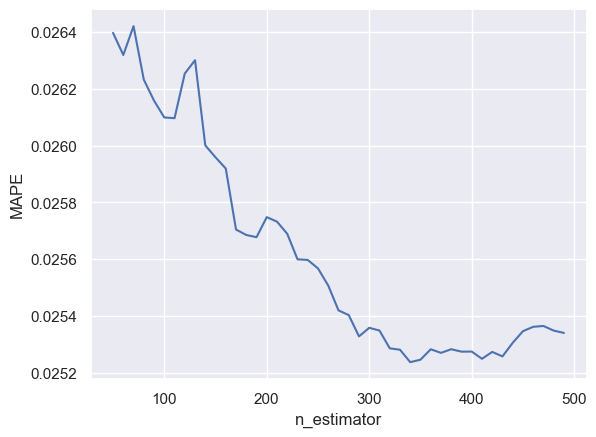

In [93]:
# Create a model.
MAPE=[]
n_est = []
for i in range(50,500,10):
    forest = RandomForestRegressor(n_estimators=i, 
                                    criterion='squared_error', 
                                    min_samples_split=2,
                                    min_samples_leaf=1, 
                                    max_features='auto',
                                    bootstrap=True, 
                                    n_jobs=-1, 
                                    random_state=42).fit(X_train, y_train)
    # Create the predictions.
    y_pred = forest.predict(X_test)
    MAPE.append(metrics.mean_absolute_percentage_error(y_test, y_pred))
    n_est.append(i)
    
# Visualise the results
sns.lineplot(x=n_est, y=MAPE)
plt.ylabel("MAPE")
plt.xlabel("n_estimator")

In [94]:
# Determine the n_est for minimized MAPE
n_est = pd.Series(n_est)
MAPE = pd.Series(MAPE)
df_MAPE = pd.concat([n_est, MAPE], axis=1).rename(columns={0:'n_est', 1:'MAPE'})
df_MAPE['MAPE'].min()
# i.e. n_estimator =340

0.025238508808574922

In [95]:
# Tuned Model by n_estimator
forest = RandomForestRegressor(n_estimators=340, 
                               criterion='squared_error', 
                               min_samples_split=2,
                               min_samples_leaf=1, 
                               max_features='auto',
                               bootstrap=True, 
                               n_jobs=-1, 
                               random_state=42).fit(X_train, y_train)

from sklearn import metrics
# Create the predictions.
y_pred = forest.predict(X_test)

# Calculate and display the metrics.
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Mean Absolute Percentage Error: {0}%".format(metrics.mean_absolute_percentage_error(y_test, y_pred)*100))

Mean Absolute Error: 29.068495098039214
Mean Squared Error: 5736.781651917533
Root Mean Squared Error: 75.74154508535942
Mean Absolute Percentage Error: 2.523850880857492%


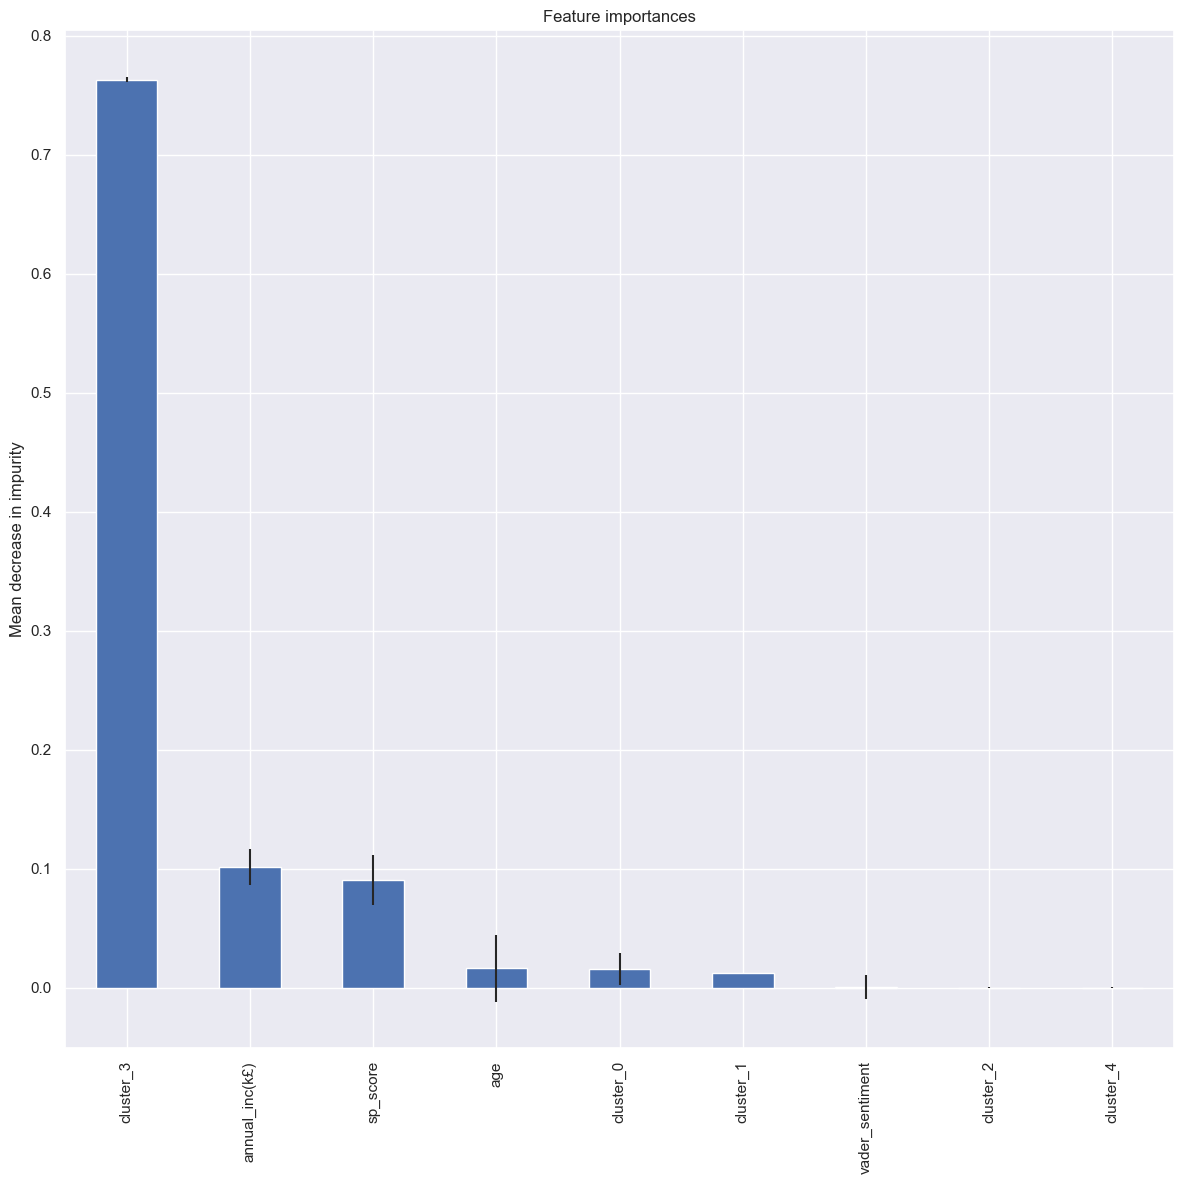

In [96]:
import matplotlib.pyplot as plt
import time

# Create a list of feature names
feature_names =[f"{i}" for i in X_train]

# Start measuring the time required to cnostruct the random forest mode
start_time = time.time()

# Determin feature importance
importances = forest.feature_importances_

# Summarize the feature importance
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Create a data structure to store the importances
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Consturct a bar graph
fig,ax = plt.subplots(figsize=(12,12))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Random Forest Regressor with LOG transformed dependent variable

In [97]:
# Set the variables:
X1 = dummies[['age', 
             'annual_inc(k£)',
             'sp_score', 
             'cluster_0',
             'cluster_1',
             'cluster_2',
             'cluster_3',
             'cluster_4',
             'vader_sentiment']]

y1 = dummies['log(loyal)']

# Create train and test datasets.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,
                                                    test_size=0.3,
                                                    random_state=42)
print(y1)
X1

0       5.347108
1       6.261492
2       3.688879
3       6.331502
4       5.902633
          ...   
1995    8.301770
1996    6.289716
1997    8.633019
1998    6.954639
1999    6.171701
Name: log(loyal), Length: 2000, dtype: float64


age  annual_inc(k£)  sp_score  cluster_0  cluster_1  cluster_2  \
0     18   12.30           39        0          1          0           
1     23   12.30           81        0          0          0           
2     22   13.12           6         0          1          0           
3     25   13.12           77        0          0          0           
4     33   13.94           40        0          1          0           
...   ..     ...           ..       ..         ..         ..           
1995  37   84.46           69        0          0          0           
1996  43   92.66           8         0          0          1           
1997  34   92.66           91        0          0          0           
1998  34   98.40           16        0          0          1           
1999  32   92.66           8         0          0          1           

      cluster_3  cluster_4  vader_sentiment  
0     0          0         -0.7406           
1     0          1          0.9433           
2     0          0          0.6939           
3     0          1          0.8997           
4     0          0         -0.6808           
...  ..         ..             ...           
1995  1          0          0.9423           
1996  0          0          0.8606           
1997  1          0          0.6588           
1998  0          0          0.5562           
1999  0          0          0.5209           

[2000 rows x 9 columns]

Text(0.5, 0, 'n_estimator')

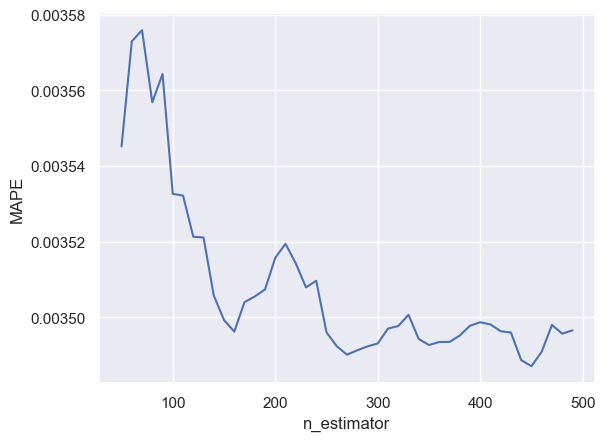

In [98]:
# Create a model.
MAPE1=[]
n_est1 = []
for i in range(50,500,10):
    forest1 = RandomForestRegressor(n_estimators=i, 
                                    criterion='squared_error', 
                                    min_samples_split=2,
                                    min_samples_leaf=1, 
                                    max_features='auto',
                                    bootstrap=True, 
                                    n_jobs=-1, 
                                    random_state=42).fit(X1_train, y1_train)
    # Create the predictions.
    y1_pred = forest1.predict(X1_test)
    MAPE1.append(metrics.mean_absolute_percentage_error(y1_test, y1_pred))
    n_est1.append(i)
    
# Visualise the results
sns.lineplot(x=n_est1, y=MAPE1)
plt.ylabel("MAPE")
plt.xlabel("n_estimator")

In [99]:
# Determine the n_est for minimized MAPE
n_est1 = pd.Series(n_est1)
MAPE1 = pd.Series(MAPE1)
df_MAPE1 = pd.concat([n_est1, MAPE1], axis=1).rename(columns={0:'n_est', 1:'MAPE'})
df_MAPE1['MAPE'].min()
# n_est=450

0.0034870595772864437

In [100]:
forest1 = RandomForestRegressor(n_estimators=450, 
                                    criterion='squared_error', 
                                    min_samples_split=2,
                                    min_samples_leaf=1, 
                                    max_features='auto',
                                    bootstrap=True, 
                                    n_jobs=-1, 
                                    random_state=42).fit(X1_train, y1_train)
# Create the predictions.
y1_pred = forest1.predict(X1_test)

# Calculate and display the metrics.
print("Mean Absolute Error:", metrics.mean_absolute_error(y1_test, y1_pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(y1_test, y1_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print("Mean Absolute Percentage Error: {0}%".format(metrics.mean_absolute_percentage_error(y1_test, y1_pred)*100))

Mean Absolute Error: 0.02274145167450708
Mean Squared Error: 0.002891211402862401
Root Mean Squared Error: 0.05376998607831697
Mean Absolute Percentage Error: 0.3487059577286444%


# The model with log transformation had shown improvement of MAPE almost 10 times than the orginal model.

Text(0, 0.5, 'Mean decrease in impurity')

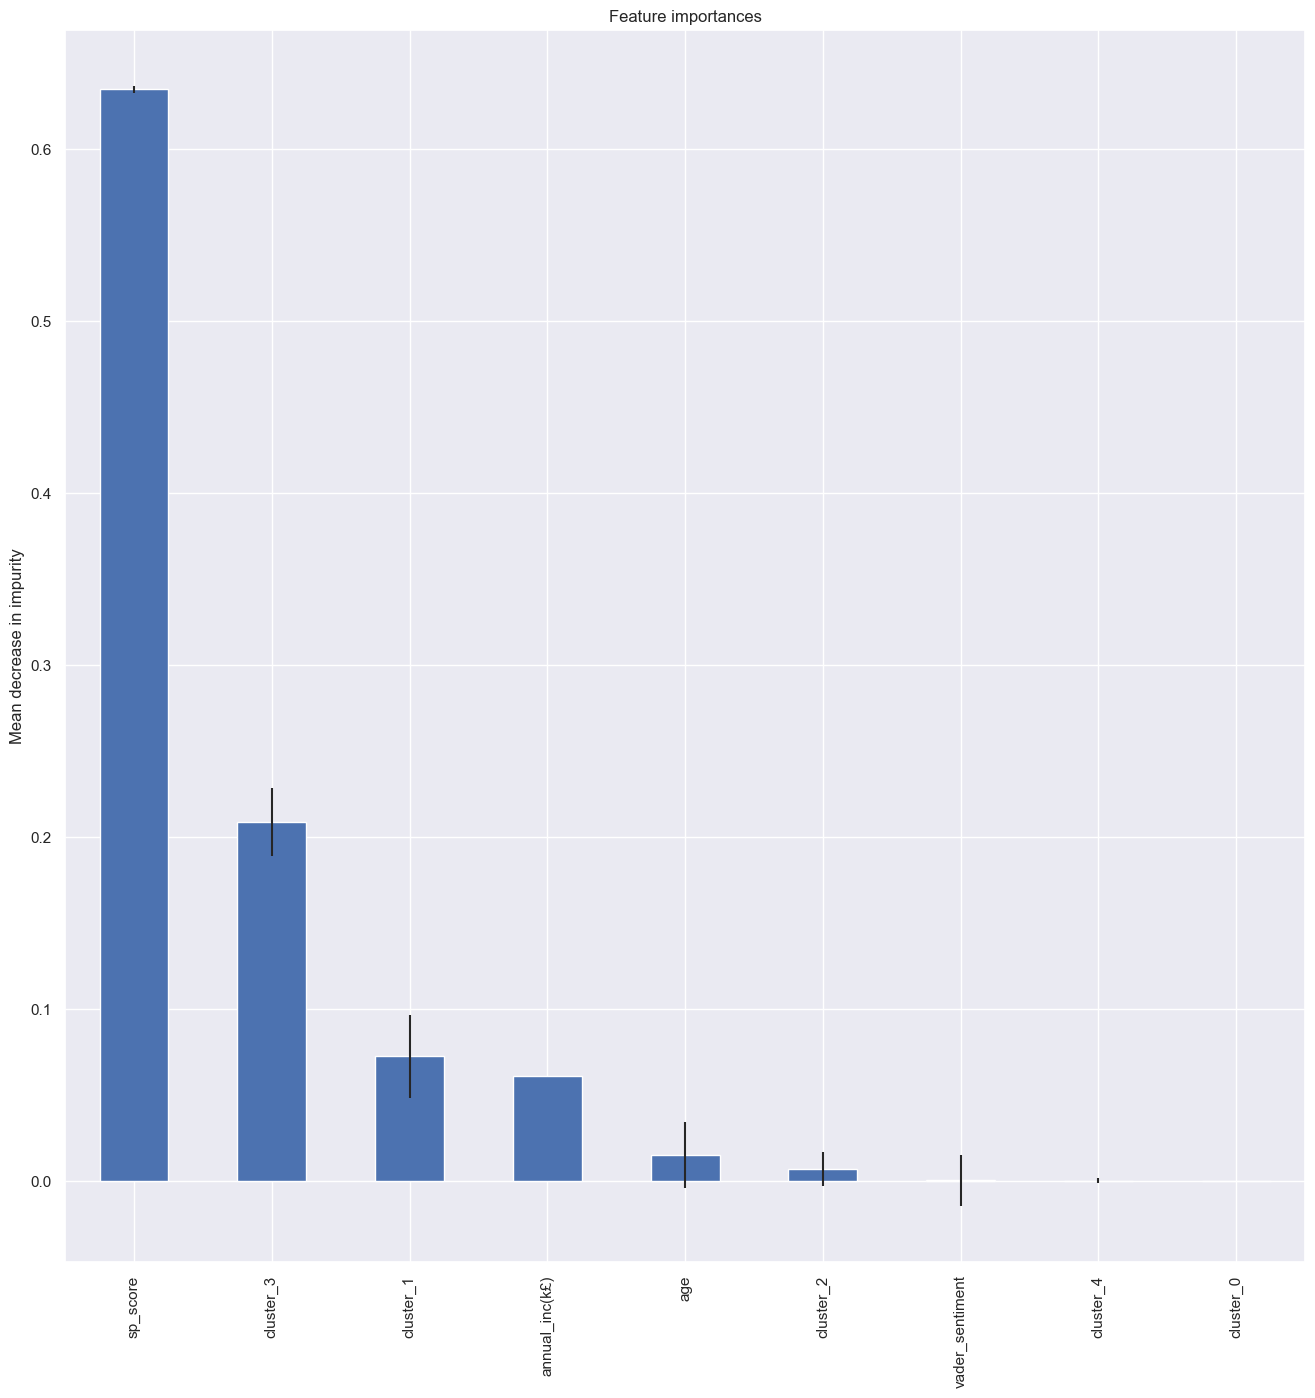

In [123]:
import matplotlib.pyplot as plt
import time

# Create a list of feature names
feature_names =[f"{i}" for i in X1_train]

# Start measuring the time required to cnostruct the random forest mode
start_time = time.time()

# Determin feature importance
importances = forest1.feature_importances_

# Summarize the feature importance
std = np.std([tree.feature_importances_ for tree in forest1.estimators_], axis=0)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Create a data structure to store the importances
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Consturct a bar graph
fig,ax = plt.subplots(figsize=(16,16))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
theme_


In [102]:
# Select the necessary columns to merge and give further information to the Reviews dataset
sales=pd.read_csv('turtle_sales.csv', usecols=['Product','Genre','Publisher'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    352 non-null    int64 
 1   Genre      352 non-null    object
 2   Publisher  352 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.4+ KB


In [103]:
# Check and remove duplicates in the sales file 
sales.drop_duplicates(inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 346
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    182 non-null    int64 
 1   Genre      182 non-null    object
 2   Publisher  182 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.7+ KB


In [104]:
# Rename the column name which would be served as key
sales.rename(columns={'Product':'product'}, inplace=True)
# View the result
sales['product'].unique()

array([ 107,  123,  195,  231,  249,  254,  263,  283,  291,  326,  399,
        405,  453,  466,  486,  504,  515,  518,  535,  577,  615,  618,
        624,  629,  760,  811,  815,  830,  876,  930,  948,  977,  978,
        979,  999, 1012, 1031, 1175, 1183, 1212, 1241, 1307, 1459, 1463,
       1473, 1497, 1501, 1506, 1577, 1581, 1592, 1618, 1940, 1945, 1970,
       2079, 2114, 2130, 2139, 2162, 2173, 2253, 2261, 2285, 2286, 2296,
       2324, 2326, 2371, 2387, 2404, 2457, 2495, 2518, 2521, 2793, 2795,
       2807, 2811, 2814, 2829, 2849, 2870, 2874, 2877, 3112, 3153, 3158,
       3165, 3267, 3277, 3403, 3427, 3436, 3478, 3498, 3524, 3525, 3547,
       3619, 3629, 3645, 3657, 3667, 3678, 3711, 3865, 3878, 3885, 3887,
       3896, 3955, 3967, 4047, 4065, 4390, 4399, 4405, 4415, 4452, 4459,
       4470, 4477, 4491, 4619, 4673, 4692, 4702, 4712, 5429, 5430, 5453,
       5493, 5510, 5512, 5726, 5740, 5758, 6215, 6233, 6271, 6287, 6310,
       6424, 6431, 6466, 6471, 6504, 6507, 6646, 66

In [105]:
# Merge the two data frames on the selected key, i.e. product
final =pd.merge(df4, sales, how='left',on='product')
final.shape


(2070, 18)

In [106]:
# Check and remove missing values, because the left data frame observations were more than the right data frame
print(final.isna().sum())
final[final.isna().any(axis=1)]
final.dropna(inplace=True)

gender             0  
age                0  
annual_inc(k£)     0  
sp_score           0  
loyal_pts          0  
edu                0  
product            0  
review             0  
summary            0  
log(loyal)         0  
log(income)        0  
log(spending)      0  
cluster_class      0  
tblob(review)      0  
tblob(summary)     0  
vader_sentiment    0  
Genre              250
Publisher          250
dtype: int64


In [107]:
# View the result
print("The final number of rows and columns:" ,final.shape)
final['Publisher'].value_counts()

The final number of rows and columns: (1820, 18)


Nintendo                                  756
Sony Computer Entertainment               179
Microsoft Game Studios                    150
Electronic Arts                           150
Activision                                132
Take-Two Interactive                      83 
Ubisoft                                   70 
Capcom                                    40 
Square Enix                               40 
Konami Digital Entertainment              30 
Bethesda Softworks                        20 
Sega                                      20 
Sony Computer Entertainment Europe        20 
SquareSoft                                20 
505 Games                                 20 
Universal Interactive                     10 
Namco Bandai Games                        10 
Atari                                     10 
GT Interactive                            10 
LucasArts                                 10 
Virgin Interactive                        10 
Eidos Interactive                 

<Axes: xlabel='vader_sentiment', ylabel='Publisher'>

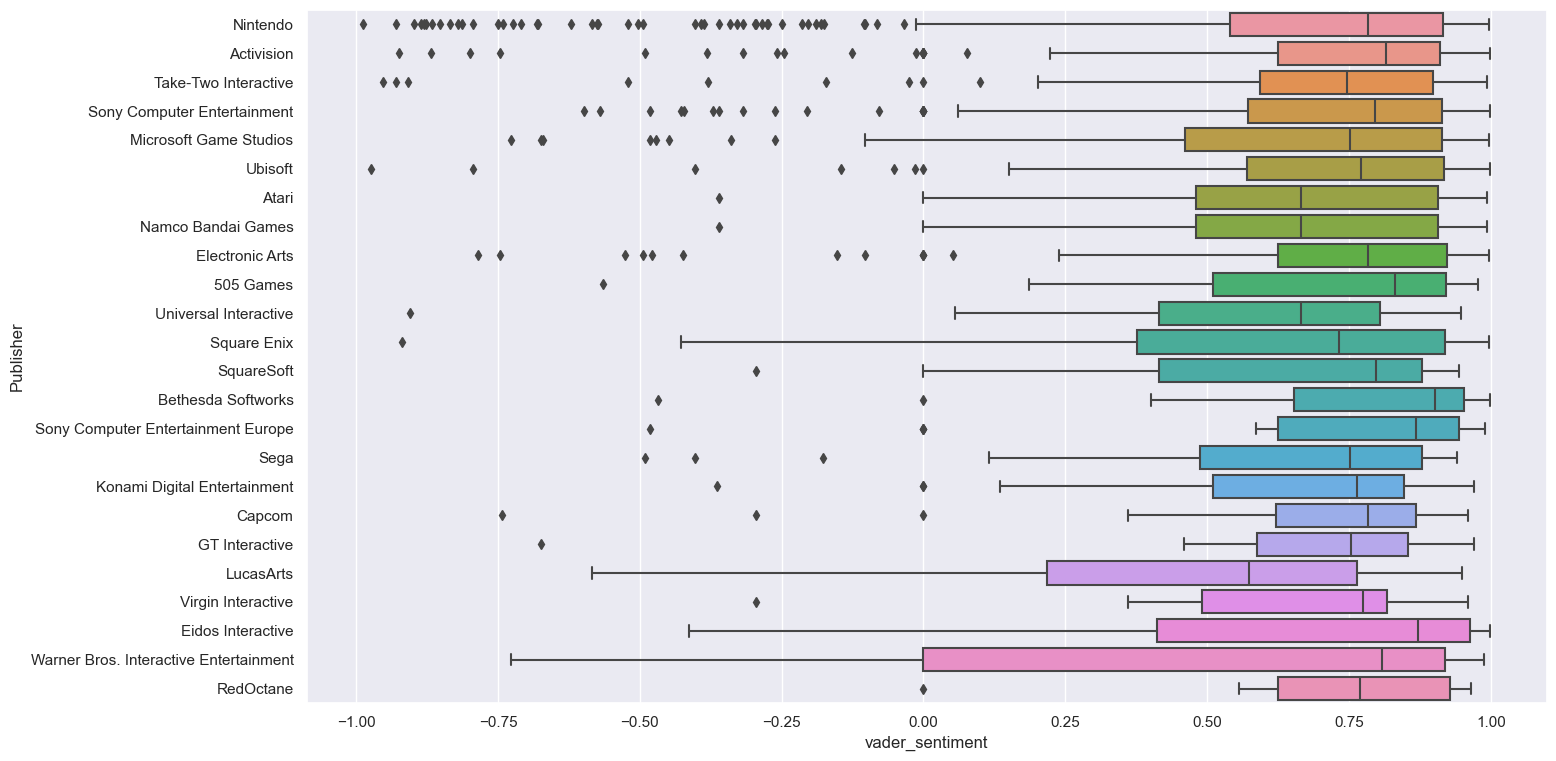

In [108]:
# Visualise the joined result for the publisher against sentiment scores
fig,ax= plt.subplots(figsize=(16,9))
sns.boxplot(x='vader_sentiment', y='Publisher', data=final)

In [119]:
df_publisher = final.groupby('Publisher')[['vader_sentiment','tblob(review)']].agg(['mean','count'])
publisher_reviews = df_publisher.sort_values([('vader_sentiment','mean')], ascending=False).head(10)
publisher_reviews.to_csv("publisher_review.csv")
# View the results
publisher_reviews

vader_sentiment       tblob(review)      
                                              mean count          mean count
Publisher                                                                   
Bethesda Softworks                  0.741385        20    0.142344      20  
RedOctane                           0.707290        10    0.264887      10  
Electronic Arts                     0.687925        150   0.268539      150 
505 Games                           0.675850        20    0.192573      20  
Sony Computer Entertainment         0.668585        179   0.216268      179 
Capcom                              0.668313        40    0.278740      40  
Sony Computer Entertainment Europe  0.665920        20    0.157064      20  
Ubisoft                             0.653513        70    0.223375      70  
Activision                          0.645052        132   0.212859      132 
Nintendo                            0.640269        756   0.219660      756

In [116]:
# Visualise the mean sentiment across different publsiher
publisher = final.groupby('Publisher')[['vader_sentiment']].mean().sort_values(by='vader_sentiment', ascending=False)
sns.barplot(publisher, x='vader_sentiment', y=publisher.index).set(title="Average Sentiment Reviews by Publisher")

vader_sentiment
Publisher                                              
Bethesda Softworks                      0.741385       
RedOctane                               0.707290       
Electronic Arts                         0.687925       
505 Games                               0.675850       
Sony Computer Entertainment             0.668585       
Capcom                                  0.668313       
Sony Computer Entertainment Europe      0.665920       
Ubisoft                                 0.653513       
Activision                              0.645052       
Nintendo                                0.640269       
Konami Digital Entertainment            0.639157       
Take-Two Interactive                    0.627749       
Virgin Interactive                      0.622990       
SquareSoft                              0.621865       
Eidos Interactive                       0.617950       
GT Interactive                          0.612130       
Microsoft Game Studios                  0.610619       
Sega                                    0.571425       
Square Enix                             0.563192       
Namco Bandai Games                      0.562510       
Atari                                   0.562510       
Universal Interactive                   0.482280       
LucasArts                               0.447500       
Warner Bros. Interactive Entertainment  0.406420

[Text(0.5, 1.0, 'Average Sentiment Reviews by Publisher')]

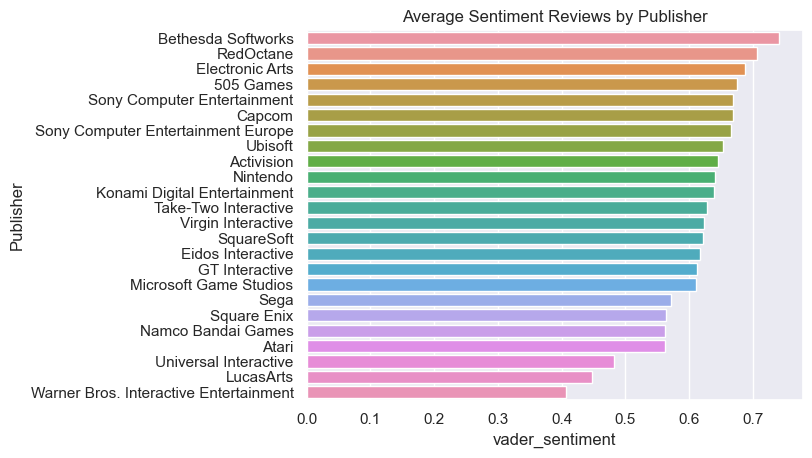

In [118]:
sns.barplot(publisher, x='vader_sentiment', y=publisher.index).set(title="Average Sentiment Scores by Publisher")